![EUFMD LOGO](./data/logo_eufmd.png)

# **Recommender System Project for FAO EuFMD vLearning Platform** <img src="./data/books.png" alt="Book Icon" width="40"/>

The European Commission for the Control of Foot-and-Mouth Disease (EuFMD) has been a leading force in fighting foot-and-mouth disease across Europe. This commission operates under the Food and Agriculture Organization (FAO) of the United Nations.

To enhance its efforts, we are <span style="color:#4285f4">developing a machine learning-based recommender system designed for veterinarians</span> using the vLearning platform. This system helps veterinarians find and select relevant courses more effectively, improving their learning experience and ultimately supporting better disease management.

# <img src="./data/target.png" alt="Objective Icon" width="30"/> **Objective**

The primary objective of this project is to <span style="color:#4285f4">develop an advanced recommender system for veterinarians using the vLearning platform</span>.

By leveraging machine learning techniques, the aim is not only to <span style="color:#4285f4">improve the relevance and accessibility of educational resources</span> for veterinarians but also to <span style="color:#4285f4">enhance their learning outcomes and professional development</span>.

These advancements will serve as a valuable asset for:

- Tailoring course recommendations to individual learning needs,
- Increasing engagement and satisfaction among users, and
- Supporting better disease management practices across all around the world.

# <img src="./data/file.png" alt="Overview Icon" width="30"/> **Dataset Overview**

Our dataset is primarily sourced from the <span style="color:#4285f4"><strong>EuFMD database</strong></span> through <span style="color:#4285f4"><strong>DBeaver</strong></span>, focusing on the <span style="color:#4285f4"><strong>TOM tool (EuFMD Training Management System)</strong></span>. This tool includes data on <span style="color:#4285f4"><strong>user enrollments</strong></span>, <span style="color:#4285f4"><strong>course selections</strong></span>, and related information.

Additionally, we have gathered extra data from <span style="color:#4285f4"><strong>datasheets</strong></span> to help define and categorize course offerings.

Together, these sources provide a comprehensive view of <span style="color:#4285f4"><strong>training activities</strong></span> and <span style="color:#4285f4"><strong>user interactions</strong></span>, aiding in the analysis and enhancement of the vLearning platform.


# <img src="./data/iteration.png" alt="Methodology Icon" width="30"/> **Methodology**

![Methodology](./data/methodology.png)

# <img src="./data/data-cleaning.png" alt="Datacleaning Icon" width="30"/> **Data Loading and Cleaning**

In [1]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

## 1. Data Connection with SQL

In [2]:
connection_details = {"host": 'eufmd-database-1.cqodkl4vazie.eu-north-1.rds.amazonaws.com',
                      "user": 'root',
                      "password": 'YOUR_PASSWORD',
                      "db": 'db_training',
                      "port": 3306
}

In [3]:
def create_df_pymysql(connection_details, query):
    try:
        # Establish the database connection
        conn = pymysql.connect(**connection_details)
    
        # Create the dataframe
        df = pd.read_sql(query, conn)
        
    except pymysql.Error as e:
        print(f"Error: {e}")
        
    finally:
        # Close the connection (VERY IMPORTANT!)
        if conn:
            conn.close()

    return df

## 2. Data Loading

In [4]:
tom_data = "SELECT * FROM db_tompilot.tom_enrolments"

tom_enrolments = create_df_pymysql(connection_details, tom_data)

/var/folders/t3/j6bxkcns4fg5jmpk0m7bc3580000gn/T/ipykernel_25347/1828803800.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
brick_mapping = pd.read_excel("data/brick_mapping.xlsx")

In [6]:
master_courses = pd.read_excel("data/master_courses.xlsx")

## 3. Data Cleaning

In [7]:
tom_enrolments.head()

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,completed,time_enrolled,time_completed,progress,status,course_id,moodle_category,new_id
0,6379,Jon Simonyan,jsimmk19@mail.ru,Open Session Online 2014,Open Session Online 2014,NU,Erevan,Armenia,,,No,2020-07-10 00:00:00,None,50.0,Open,45.0,Resources / Open Session,179
1,6392,Mariam Militosyan,militosyan_96@mail.ru,Обучающий Онлайн Курс по Изучению Ящура на рус...,FITC_RU4,FMD Investigation Training Course,,Armenia,,,Yes,2020-09-17 00:00:00,2020-10-21 00:00:00,100.0,Completed,244.0,FMD Investigation Training Course,180
2,6393,Mariam Militosyan,militosyan_96@mail.ru,Knowledge Bank,Knowledge Bank,NU,,Armenia,,,No,2020-09-28 00:00:00,None,50.0,Open,3.0,Resources,181
3,6394,Irma Artushyan,irma.artushyan95@mail.ru,Обучающий Онлайн Курс по Изучению Ящура на рус...,FITC_RU4,FMD Investigation Training Course,,Armenia,,,Yes,2020-09-17 00:00:00,2020-10-21 00:00:00,100.0,Completed,244.0,FMD Investigation Training Course,183
4,6395,Irma Artushyan,irma.artushyan95@mail.ru,Open Session Online 2014,Open Session Online 2014,NU,,Armenia,,,No,2020-05-10 00:00:00,None,50.0,Open,45.0,Resources / Open Session,185


In [8]:
brick_mapping.head()

,main_topic,Disease covered,Foundation: Simulation exercises,Foundation: Training,Foundation: Laboratories,Foundation: Contingency planning,Foundation: Assessment,"Foundation: Identification, Registration and traceability",Foundation: Risk assessment,Foundation: Information data management,...,Emergency: Restricted zones,Emergency: Psychological support,Emergency: Resource and impact tools and calculators,Emergency: Logistic,Emergency: National emergency anagement,Emergency: Coordination and PPP,Emergency: Wildlife,Reconstruction: Recovery of disease status,Reconstruction: Vaccination exit strategy,Reconstruction: Re-stocking
0,African Animal Trypanosomosis,FAST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,African Swine Fever,FMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Animal Depopulation,FAST,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Biorisk,FMD,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Epidemiology,Single Disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
master_courses.head()

,moodle_id,shortname,fullname,language,format,moodle_category,main_topic,level,edition,pillar,duration
0,1,EuFMD vLearning,EuFMD Virtual Learning,NaN,vlearning,NaN,NU,NaN,1,NaN,12
1,2,KTC 6 Induction Course,KTC 6 Induction Course,English,face to face,Kathmandu Real Time Training,FMD Emergency Preparation Course,Advanced,6,Pillar I,10
2,3,Knowledge Bank,Knowledge Bank,English,vlearning,Resources,NU,NaN,1,NaN,12
3,4,Playpen,Playpen,English,vlearning,Administration,NU,NaN,1,NaN,12
4,7,KTC 7 Induction Course,KTC 7 Induction Course,English,face to face,Kathmandu Real Time Training,FMD Emergency Preparation Course,Advanced,7,Pillar I,10


In [10]:
# Replace empty strings with NaN in the same columns
brick_mapping.iloc[:, 2:] = brick_mapping.iloc[:, 2:].replace('', np.nan)

# Fill NaN with 0 in the same columns
brick_mapping.iloc[:, 2:] = brick_mapping.iloc[:, 2:].fillna(0)

In [11]:
brick_mapping.head()

,main_topic,Disease covered,Foundation: Simulation exercises,Foundation: Training,Foundation: Laboratories,Foundation: Contingency planning,Foundation: Assessment,"Foundation: Identification, Registration and traceability",Foundation: Risk assessment,Foundation: Information data management,...,Emergency: Restricted zones,Emergency: Psychological support,Emergency: Resource and impact tools and calculators,Emergency: Logistic,Emergency: National emergency anagement,Emergency: Coordination and PPP,Emergency: Wildlife,Reconstruction: Recovery of disease status,Reconstruction: Vaccination exit strategy,Reconstruction: Re-stocking
0,African Animal Trypanosomosis,FAST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,African Swine Fever,FMD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Animal Depopulation,FAST,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Biorisk,FMD,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Epidemiology,Single Disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Lowercasing the words in order to have same format for all columns and merge them without problems
brick_mapping["main_topic"] = brick_mapping["main_topic"].str.lower()
tom_enrolments["course_category"] = tom_enrolments["course_category"].str.lower()
tom_enrolments["course_fullname"] = tom_enrolments["course_fullname"].str.lower()
tom_enrolments["course_shortname"] = tom_enrolments["course_shortname"].str.lower()
master_courses["shortname"] = master_courses["shortname"].str.lower()
master_courses["fullname"] = master_courses["fullname"].str.lower()
master_courses["main_topic"] = master_courses["main_topic"].str.lower()
master_courses["moodle_category"] = master_courses["moodle_category"].str.lower()

In [13]:
brick_mapping.isnull().sum()

main_topic                                                   0
Disease covered                                              8
Foundation: Simulation exercises                             0
Foundation: Training                                         0
Foundation: Laboratories                                     0
Foundation: Contingency planning                             0
Foundation: Assessment                                       0
Foundation: Identification, Registration and traceability    0
Foundation: Risk assessment                                  0
Foundation: Information data management                      0
Foundation: Models                                           0
Foundation: Surveillance                                     0
Alert: Awareness                                             0
Alert: Clinical Examination                                  0
Alert: Epidemiological Investigation                         0
Alert: Sampling                                        

In [14]:
master_courses.isnull().sum()

moodle_id            0
shortname            0
fullname             0
language             1
format               0
moodle_category      1
main_topic           0
level               99
edition              0
pillar             200
duration             0
dtype: int64

In [15]:
tom_enrolments.isnull().sum()

id                   0
full_name            0
email                0
course_fullname      0
course_shortname     0
course_category      0
city                 0
country              0
institution          0
role                 0
completed            0
time_enrolled        0
time_completed      52
progress             0
status               0
course_id           32
moodle_category      0
new_id               0
dtype: int64

In [16]:
# Find the intersection between the two datasets
common_courses = set(tom_enrolments["course_shortname"]) & set(master_courses["shortname"])

# Print the common courses
print("Common Courses:")
for course in common_courses:
    print(course)

Common Courses:
modelling training course for turkey
progressive control practitioners' network
fepc_en12
fepc_es
fitc_tr6
fitc_ncw_africa
eufmdis
open session online 2014
modelling network
about
préparation d'urgence contre la fièvre aphteuse
fepc_en13
fitc_tr3
earln
contingency planning network
fitc_ar
fitc_ar2
se_fr
pvm5
safe trade and fmd control workshop
help
lsd_ru
modelling 2018
fitc_tr4
simex_workshop1
os18
flitc3
st_3
pcp arabic
se_3
fitc_ru3
fepc_en9
fast_dwsc_2
simex_pt_es
asf_pilot
pvm2
afrique du nord
wildlife surveillance spain
ddcd
emergency preparedness network
fitc_tn
fepc_ru_1
knowledge bank
biorisk_management_network
rvf_arabic
ravc
fepc_uk
rbsp
fepc_canada2
fepc_mc
fepc_es5
flitc
intro_fmd_fr
appp-fast
introduction to the progressive control pathway
introduction to lumpy skin disease
ddcd_2
socio-economics_2
modelling introductory course 
what is the progressive control pathway?
vaccination network
contingency planning knowledge bank
biorisk
training focal points
si

In [17]:
# Convert course categories to sets
tom_categories = set(tom_enrolments["course_shortname"])
master_topics = set(master_courses["shortname"])

# Find courses in Tom's enrolments but not in brick_mapping (difference)
tom_only_courses = tom_categories.difference(master_topics)

# Find courses in brick_mapping but not in Tom's enrolments (difference)
master_only_courses = master_topics.difference(tom_categories)

# Print courses only in Tom's enrolments
print("Courses only in Tom's enrolments:")
for course in tom_only_courses:
    print(course)

Courses only in Tom's enrolments:
intro_sppgtp
pvp_3_23
intro_fmd_2_1
fepc_en14


In [18]:
# Print courses only in brick_mapping
print("Courses only in master_courses:")
for course in master_only_courses:
    print(course)

Courses only in master_courses:
tc
ktc 34
rpl_dpcps_4
isavetfir
fepc_au3
ktc 23 real time training
rpl_epi3
improving surveillance and early detection of fmd and similar tads in the middle east (south-east me
help for trainers
fepc_en_3
modelling introductory course: november 2016
sgp_information
introrift valley fever fr
pso_tdf
fepc_uk4
amr_ffs
rpl_aw_5
putting vaccination into practice
ng_m1
eufmd vlearning
fepc_de_1
fepc_belgium_frnl_1_2021
fepc_calgary
ntc 19 real time training
nord-baltic_simex
gva_me
test-cl
rpl_bios_2
ktc 10 induction course
rpl_dpcps_5 
fepc_sr_hr
lsd_ea_vlc
fitc_wc_africa_fr1
pvm3_gcrf_stars
ravc_2
intro_test
rpl_tad2
intermediate
lsd_rap
ug_mt
ntc 22 real time training
rpl_epi5
rp
formation_fa_fr
vrtt_us
fepc_fra1
ntc 24 real time training
eufmd_see
lsd_vlc_sadc
ntc 18 induction course
fepc_en_8
ktc 9 induction course
rtc1
simulation exercise workshop: february 2017
ktc 32
playpen
fepc_en_2
fitc_southern africa
ktc 33
rtt_reunion_europe
ktc 30 real time trai

## 4. Data Processing

<div style="background-color: #ffcccc; border: 1px solid #ff6666; border-radius: 5px; padding: 10px;">
<p style="color: black; font-weight: bold;">
    <img src="./data/data-processing.png" alt="DataProcessing Icon" width="25" style="color: #cc0000; font-weight: bold;">
    Data Processing in Action:
</p>
<p style="color: black;">
    After reviewing the data more closely, we noticed some courses are still missing from the Master Courses Excel sheet. Here are the missing course_shortname's:
</p>
<ul style="color: black;">
    <li>intro_sppgtp</li>
    <li>pvp_3_23</li>
    <li>fepc_en14 (we only have up to 13 on the Master Courses Excel sheet)</li>
    <li>intro_fmd_2_1</li>
</ul>
<p style="color: black;">
    The approach we follow to do the imputation with a help from Pilar are:
</p>
<ul style="color: black;">
    <li>Dropped <strong>"intro_sppgtp"</strong> from the dataframe because it is not defined yet from EuFMD team who defines the course names.</li>
    <li>Changed <strong>"pvp_3_23"</strong> to <strong>"putting vaccination into practice"</strong>, they are same classes but different way of naming.</li>
    <li>Changed <strong>"fepc_en14"</strong> to <strong>"fepc_en13"</strong> because they are same courses but different editions.</li>
    <li>Changed <strong>"intro_fmd_2_1"</strong> to <strong>"introduction to foot-and-mouth disease"</strong> because they are same courses but different named.</li>
</ul>
<p style="color: black;">
    Additionally, we manually changed some course_shortname on the Master Courses Excel sheet to match those in tom_enrolments for consistency in merging. We double-checked their course_id numbers to ensure they match the moodle_id on the Master Courses Excel sheet, confirming they are the same courses with different names.
</p>
<p style="color: black;">
    Here are the specific changes we made:
</p>
<ul style="color: black;">
    <li>Changed <strong>"PrÃ©paration d'Urgence Contre la FiÃ¨vre Aphteuse"</strong> to <strong>"Préparation d'Urgence Contre la Fièvre Aphteuse"</strong> for the French course with unusual characters.</li>
    <li>Changed <strong>"IntroRift Valley Fever"</strong> to <strong>"IntroRVF"</strong>.</li>
    <li>Changed <strong>"Rift Valley Fever_Arabic"</strong> to <strong>"RVF_Arabic"</strong>.</li>
</ul>
</div>



### 4.1 intro_sppgtp drop

In [19]:
tom_enrolments[tom_enrolments["course_id"].isna()]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,completed,time_enrolled,time_completed,progress,status,course_id,moodle_category,new_id
485,6474,German Caceres Garrido,gcaceres@mapa.es,training focal points,training focal points,nu,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,No,2014-03-27 00:00:00,None,0.0,Open,NaN,Discussion Groups,3870
486,6475,German Caceres Garrido,gcaceres@mapa.es,modelling introductory course: september 2015,modelling introductory course,modelling,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,No,2014-09-07 00:00:00,None,77.8,Open,NaN,Workshop Induction Courses,3871
487,6479,German Caceres Garrido,gcaceres@mapa.es,contingency planning knowledge bank,contingency planning knowledge bank,contingency planning,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,No,2014-12-04 00:00:00,None,0.0,Open,NaN,Resources,3875
488,6480,German Caceres Garrido,gcaceres@mapa.es,fmd emergency preparation course uk,fepc_uk,fmd emergency preparation course,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,No,2015-05-07 00:00:00,None,42.9,Open,NaN,English,3876
489,6481,German Caceres Garrido,gcaceres@mapa.es,curso de preparación para alertas de fiebre af...,fepc_es,fmd emergency preparation course,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,No,2015-05-28 00:00:00,None,0.0,Open,NaN,Spanish,3877
490,6497,German Caceres Garrido,gcaceres@mapa.es,foot-and-mouth disease wildlife surveillance i...,wildlife surveillance spain,wildlife surveillance,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,No,2019-01-09 00:00:00,None,60.0,Open,NaN,Workshop Induction Courses,3893
491,6498,German Caceres Garrido,gcaceres@mapa.es,regional approach: portugal-spain fmd simulati...,simex_pt_es,simulation exercises,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,No,2019-03-18 00:00:00,None,0.0,Open,NaN,Workshop Induction Courses,3894
492,6499,German Caceres Garrido,gcaceres@mapa.es,open session online 2018,os18,open session,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,No,2019-04-09 00:00:00,None,1.2,Open,NaN,Open Session,3895
493,6519,Elena Garcia Villacieros,EGVillacieros@mapama.es,introduction to foot-and-mouth disease,introduction to foot-and-mouth disease,open access courses,,Spain,,,No,2020-05-19 00:00:00,None,14.3,Open,NaN,Open Access Courses,3915
494,6520,Elena Garcia Villacieros,EGVillacieros@mapama.es,organizing simulation exercises for animal dis...,simex_online,simulation exercises,,Spain,,,Yes,2020-06-10 00:00:00,2020-07-12 00:00:00,100.0,Completed,NaN,Simulation Exercises,3916


In [20]:
tom_enrolments.loc[511]

id                                                    6539
full_name                            Sergio Bonilla Garcia
email                                     sbonilla@mapa.es
course_fullname     introduction to sheep pox and goat pox
course_shortname                              intro_sppgtp
course_category                        open access courses
city                                                      
country                                              Spain
institution                                               
role                 Central level government veterinarian
completed                                              Yes
time_enrolled                          2023-11-20 00:00:00
time_completed                         2023-11-20 00:00:00
progress                                             100.0
status                                           Completed
course_id                                              NaN
moodle_category                        Open Access Cours

In [21]:
tom_enrolments[tom_enrolments["course_shortname"] == "intro_sppgtp"]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,completed,time_enrolled,time_completed,progress,status,course_id,moodle_category,new_id
511,6539,Sergio Bonilla Garcia,sbonilla@mapa.es,introduction to sheep pox and goat pox,intro_sppgtp,open access courses,,Spain,,Central level government veterinarian,Yes,2023-11-20 00:00:00,2023-11-20 00:00:00,100.0,Completed,NaN,Open Access Courses,3935


In [22]:
# Dropping the intro_sppgtp course
tom_enrolments.drop(511, inplace=True)

In [23]:
# Sanity check
tom_enrolments[tom_enrolments["course_shortname"] == "intro_sppgtp"]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,completed,time_enrolled,time_completed,progress,status,course_id,moodle_category,new_id


### 4.2 fepc_en14 imputation

In [24]:
tom_enrolments[tom_enrolments["course_shortname"] == "fepc_en14"]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,completed,time_enrolled,time_completed,progress,status,course_id,moodle_category,new_id
545,6687,Ramona Wissmann,ramona.wissmann@lu.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Regional level/field veterinarian,Yes,0000-00-00 00:00:00,2024-05-15 14:23:00,100.0,completed,427.0,,4395
546,6688,Anna Lena Muñoz-Zogg,annalena.munoz@alt.gr.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,"Chur, Graubünden",Switzerland,,Central level government veterinarian,Yes,0000-00-00 00:00:00,2024-05-16 09:46:00,100.0,completed,427.0,,4396
547,6689,Herrmann Meinhardis,meinhardis.herrmann@lu.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Regional level/field veterinarian,Yes,0000-00-00 00:00:00,2024-05-15 14:23:00,100.0,completed,427.0,,4397
549,6691,Andrea Stoller,andrea.stoller@veta.zh.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Central level government veterinarian,Yes,0000-00-00 00:00:00,2024-05-14 11:14:00,100.0,completed,427.0,,4399
550,6692,Dominique Dietiker,dominique.dietiker@veta.zh.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Central level government veterinarian,Yes,0000-00-00 00:00:00,2024-05-15 21:12:00,100.0,completed,427.0,,4400
551,6693,Larissa Inglin,larissa.inglin@veta.zh.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,Zürich,Switzerland,,Regional level/field veterinarian,Yes,0000-00-00 00:00:00,2024-05-15 09:05:00,100.0,completed,427.0,,4401
553,6695,Annina Guggisberg,annina.guggisberg@veta.zh.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Central level government veterinarian,Yes,0000-00-00 00:00:00,2024-05-16 10:51:00,100.0,completed,427.0,,4403
554,6696,Nicolas Lendinez Bolanos,Nicolas.Lendinez-Bolanos@etat.ge.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,Genève,Switzerland,,Regional level/field veterinarian,Yes,0000-00-00 00:00:00,2024-05-18 19:06:00,100.0,completed,427.0,,4404
555,6697,Ramona Zimmermann,ramona.zimmermann@ag.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Regional level/field veterinarian,Yes,0000-00-00 00:00:00,2024-05-18 16:28:00,100.0,completed,427.0,,4405
556,6698,Olivier Romand,olivier.romand@etat.ge.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,Geneva,Switzerland,,Regional level/field veterinarian,Yes,0000-00-00 00:00:00,2024-05-20 19:39:00,100.0,completed,427.0,,4406


In [25]:
# Update the rows where course_shortname is 'fepc_en14' to 'fepc_en13'
tom_enrolments.loc[tom_enrolments['course_shortname'] == 'fepc_en14', 'course_shortname'] = 'fepc_en13'

# Update the rows where course_id is 427 to 374 to align
tom_enrolments.loc[tom_enrolments['course_id'] == 427, 'course_id'] = 374

In [26]:
# Sanity check
tom_enrolments[tom_enrolments["course_shortname"] == "fepc_en14"]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,completed,time_enrolled,time_completed,progress,status,course_id,moodle_category,new_id


### 4.3 intro_fmd_2_1 imputation

In [27]:
tom_enrolments[tom_enrolments["course_shortname"] == "intro_fmd_2_1"]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,completed,time_enrolled,time_completed,progress,status,course_id,moodle_category,new_id
548,6690,Herrmann Meinhardis,meinhardis.herrmann@lu.ch,introduction to foot-and-mouth disease,intro_fmd_2_1,open access courses,,Switzerland,,Regional level/field veterinarian,No,0000-00-00 00:00:00,0000-00-00 00:00:00,50.0,open,437.0,,4398
552,6694,Larissa Inglin,larissa.inglin@veta.zh.ch,introduction to foot-and-mouth disease,intro_fmd_2_1,open access courses,Zürich,Switzerland,,Regional level/field veterinarian,No,0000-00-00 00:00:00,0000-00-00 00:00:00,50.0,open,437.0,,4402


In [28]:
# Double-check
tom_enrolments[tom_enrolments["course_shortname"] == "introduction to foot-and-mouth disease"]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,completed,time_enrolled,time_completed,progress,status,course_id,moodle_category,new_id
127,314,Wiem Moulhi,w.ie@hotmail.fr,introduction to foot-and-mouth disease,introduction to foot-and-mouth disease,fmd introduction,,Tunisia,,,No,2020-03-18 00:00:00,0000-00-00 00:00:00,50.0,open,118.0,Open Access Courses,3427
179,807,Mohamed Bouricha,medbourichaveto2005@yahoo.com,introduction to foot-and-mouth disease,introduction to foot-and-mouth disease,fmd introduction,,Tunisia,,Regional level/field veterinarian,No,2022-08-03 00:00:00,0000-00-00 00:00:00,50.0,open,118.0,Open Access Courses,3479
180,651,LATIFA MESSAOUDI,messaoudi_latifa@yahoo.fr,introduction to foot-and-mouth disease,introduction to foot-and-mouth disease,fmd introduction,SIDI BOUZID,Tunisia,,Regional level/field veterinarian,No,2022-07-03 00:00:00,0000-00-00 00:00:00,50.0,open,118.0,Open Access Courses,3480
199,3423,SENA INEL TURGUT,sena.inel@tarimorman.gov.tr,introduction to foot-and-mouth disease,introduction to foot-and-mouth disease,fmd introduction,ANKARA,Turkey,,Central level government veterinarian,Yes,2019-08-07 00:00:00,2019-09-07 00:00:00,100.0,completed,118.0,Open Access Courses,3516
260,6429,Manuel Melikyan,m.melikyan@ssfs.am,introduction to foot-and-mouth disease,introduction to foot-and-mouth disease,fmd introduction,,Armenia,,,No,2020-11-23 00:00:00,0000-00-00 00:00:00,50.0,open,118.0,Open Access Courses,3621
293,6398,Elmira Ghazaryan,elmira.ghazaryan.95@mail.ru,introduction to foot-and-mouth disease,introduction to foot-and-mouth disease,fmd introduction,,Armenia,,,No,2020-09-28 00:00:00,0000-00-00 00:00:00,50.0,open,118.0,Open Access Courses,3676
343,6567,Jonathan Fleurent,jonathan.fleurent@vd.ch,introduction to foot-and-mouth disease,introduction to foot-and-mouth disease,fmd introduction,Lausanne,Switzerland,,,No,2020-07-29 00:00:00,0000-00-00 00:00:00,50.0,open,118.0,Open Access Courses,3726
347,6580,Anne Ceppi,anne.ceppi@gmail.com,introduction to foot-and-mouth disease,introduction to foot-and-mouth disease,fmd introduction,Bassecourt,Switzerland,,,No,2021-02-27 00:00:00,0000-00-00 00:00:00,50.0,open,118.0,Open Access Courses,3730
493,6519,Elena Garcia Villacieros,EGVillacieros@mapama.es,introduction to foot-and-mouth disease,introduction to foot-and-mouth disease,open access courses,,Spain,,,No,2020-05-19 00:00:00,None,14.3,Open,NaN,Open Access Courses,3915
526,411,Hanen NCIBI,hanenncibi@yahoo.fr,introduction to foot-and-mouth disease,introduction to foot-and-mouth disease,fmd introduction,Béja,Tunisia,,Regional level/field veterinarian,Yes,2019-09-07 00:00:00,2022-10-06 00:00:00,100.0,completed,118.0,Open Access Courses,4032


In [29]:
# Update the rows where course_shortname is 'intro_fmd_2_1' to 'introduction to foot-and-mouth disease'
tom_enrolments.loc[tom_enrolments['course_shortname'] == 'intro_fmd_2_1', 'course_shortname'] = 'introduction to foot-and-mouth disease'

# Update the rows where course_id is 437 to 118 to align
tom_enrolments.loc[tom_enrolments['course_id'] == 437, 'course_id'] = 118

In [30]:
# Sanity check
tom_enrolments[tom_enrolments["course_shortname"] == "intro_fmd_2_1"]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,completed,time_enrolled,time_completed,progress,status,course_id,moodle_category,new_id


### 4.4 pvp_3_23 imputation

In [31]:
tom_enrolments[tom_enrolments["course_shortname"] == "pvp_3_23"]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,completed,time_enrolled,time_completed,progress,status,course_id,moodle_category,new_id
512,6540,Isabel Maria Guijarro Torvisco,imguijarro@mapa.es,putting vaccination into practice - september/...,pvp_3_23,workshop induction courses,Madrid,Spain,,Central level government veterinarian,Yes,2023-09-25 00:00:00,2023-10-30 00:00:00,100.0,Completed,NaN,Workshop Induction Courses,3936
514,6542,Fatima GuerreroCarvajal,fguerrero@mapa.es,putting vaccination into practice - september/...,pvp_3_23,workshop induction courses,Madrid,Spain,,Central level government veterinarian,Yes,2023-09-25 00:00:00,2023-10-27 00:00:00,100.0,Completed,NaN,Workshop Induction Courses,3938


In [32]:
# Double-cheking with the naming on master_courses
master_courses[master_courses["shortname"] == "putting vaccination into practice"]

,moodle_id,shortname,fullname,language,format,moodle_category,main_topic,level,edition,pillar,duration
96,119,putting vaccination into practice,putting vaccination into practice: march 2017,English,vlearning,workshop induction courses,post vaccination monitoring,Advanced,1,NaN,12


In [33]:
# Update the rows where course_shortname is 'pvp_3_23' to 'fepc_en13'
tom_enrolments.loc[tom_enrolments['course_shortname'] == 'pvp_3_23', 'course_shortname'] = 'putting vaccination into practice'

# Update the rows where course_id is nan to 119
tom_enrolments.loc[512, 'course_id'] = 119
tom_enrolments.loc[514, 'course_id'] = 119

In [34]:
# Sanity check
tom_enrolments[tom_enrolments["course_shortname"] == "pvp_3_23"]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,completed,time_enrolled,time_completed,progress,status,course_id,moodle_category,new_id


In [35]:
# Sanity check
tom_enrolments[tom_enrolments["course_shortname"] == "putting vaccination into practice"]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,completed,time_enrolled,time_completed,progress,status,course_id,moodle_category,new_id
512,6540,Isabel Maria Guijarro Torvisco,imguijarro@mapa.es,putting vaccination into practice - september/...,putting vaccination into practice,workshop induction courses,Madrid,Spain,,Central level government veterinarian,Yes,2023-09-25 00:00:00,2023-10-30 00:00:00,100.0,Completed,119.0,Workshop Induction Courses,3936
514,6542,Fatima GuerreroCarvajal,fguerrero@mapa.es,putting vaccination into practice - september/...,putting vaccination into practice,workshop induction courses,Madrid,Spain,,Central level government veterinarian,Yes,2023-09-25 00:00:00,2023-10-27 00:00:00,100.0,Completed,119.0,Workshop Induction Courses,3938


In [36]:
# Cheking the last status of missing values
tom_enrolments.isna().sum()

id                   0
full_name            0
email                0
course_fullname      0
course_shortname     0
course_category      0
city                 0
country              0
institution          0
role                 0
completed            0
time_enrolled        0
time_completed      52
progress             0
status               0
course_id           29
moodle_category      0
new_id               0
dtype: int64

# <img src="./data/merging.png" alt="merging Icon" width="30"/> **Data Merging**

## 1. Merge tom_enrolments with master_courses

In [37]:
# Left Merge the DataFrames based on the course shortnames
merge_master_enrolments = pd.merge(tom_enrolments, master_courses, left_on="course_shortname", right_on="shortname", how="left")

In [38]:
merge_master_enrolments.head()

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,...,shortname,fullname,language,format,moodle_category_y,main_topic,level,edition,pillar,duration
0,6379,Jon Simonyan,jsimmk19@mail.ru,open session online 2014,open session online 2014,nu,Erevan,Armenia,,,...,open session online 2014,open session online 2014,English,vlearning,open session,nu,NaN,2014,NaN,12
1,6392,Mariam Militosyan,militosyan_96@mail.ru,обучающий онлайн курс по изучению ящура на рус...,fitc_ru4,fmd investigation training course,,Armenia,,,...,fitc_ru4,ðžð±ñƒñ‡ð°ñžñ‰ð¸ð¹ ðžð½ð»ð°ð¹ð½ ðšñƒñ€ñ ð¿ð¾ ...,Russian,vlearning,fmd investigation training course,fmd investigation training course,Intermediate,4,Pillar II,112
2,6393,Mariam Militosyan,militosyan_96@mail.ru,knowledge bank,knowledge bank,nu,,Armenia,,,...,knowledge bank,knowledge bank,English,vlearning,resources,nu,NaN,1,NaN,12
3,6394,Irma Artushyan,irma.artushyan95@mail.ru,обучающий онлайн курс по изучению ящура на рус...,fitc_ru4,fmd investigation training course,,Armenia,,,...,fitc_ru4,ðžð±ñƒñ‡ð°ñžñ‰ð¸ð¹ ðžð½ð»ð°ð¹ð½ ðšñƒñ€ñ ð¿ð¾ ...,Russian,vlearning,fmd investigation training course,fmd investigation training course,Intermediate,4,Pillar II,112
4,6395,Irma Artushyan,irma.artushyan95@mail.ru,open session online 2014,open session online 2014,nu,,Armenia,,,...,open session online 2014,open session online 2014,English,vlearning,open session,nu,NaN,2014,NaN,12


In [39]:
merge_master_enrolments.isna().sum()

id                     0
full_name              0
email                  0
course_fullname        0
course_shortname       0
course_category        0
city                   0
country                0
institution            0
role                   0
completed              0
time_enrolled          0
time_completed        52
progress               0
status                 0
course_id             29
moodle_category_x      0
new_id                 0
moodle_id              0
shortname              0
fullname               0
language               0
format                 0
moodle_category_y      0
main_topic             0
level                241
edition                0
pillar               335
duration               0
dtype: int64

<div style="background-color: #ffcccc; border: 1px solid #ff6666; border-radius: 5px; padding: 10px;">
    <p style="color: #8b0000; font-weight: bold;"><img src="./data/data-processing.png" alt="DataProcessing Icon" width="25" style="color: #cc0000; font-weight: bold;">Data Processing in Action:</p>
    <p><span style="color: #000000;">We identified courses with missing course_ids. To resolve this, we copied the corresponding moodle_ids from the master_courses to the course_id field for entries with matching course names and associated ids.</span></p>
</div>

In [40]:
merge_master_enrolments[merge_master_enrolments["moodle_id"].isna()]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,...,shortname,fullname,language,format,moodle_category_y,main_topic,level,edition,pillar,duration


In [41]:
merge_master_enrolments[merge_master_enrolments["course_id"].isna()]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,...,shortname,fullname,language,format,moodle_category_y,main_topic,level,edition,pillar,duration
485,6474,German Caceres Garrido,gcaceres@mapa.es,training focal points,training focal points,nu,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,...,training focal points,training focal points,English,vlearning,discussion groups,nu,NaN,1,NaN,12
486,6475,German Caceres Garrido,gcaceres@mapa.es,modelling introductory course: september 2015,modelling introductory course,modelling,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,...,modelling introductory course,modelling introductory course: september 2015,English,workshop,workshop induction courses,modelling,Advanced,1,NaN,12
487,6479,German Caceres Garrido,gcaceres@mapa.es,contingency planning knowledge bank,contingency planning knowledge bank,contingency planning,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,...,contingency planning knowledge bank,contingency planning knowledge bank,English,vlearning,resources,nu,NaN,1,NaN,12
488,6480,German Caceres Garrido,gcaceres@mapa.es,fmd emergency preparation course uk,fepc_uk,fmd emergency preparation course,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,...,fepc_uk,fmd emergency preparation course uk,English,vlearning,english,fmd emergency preparation course,Intermediate,1,Pillar I,12
489,6481,German Caceres Garrido,gcaceres@mapa.es,curso de preparación para alertas de fiebre af...,fepc_es,fmd emergency preparation course,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,...,fepc_es,curso de preparaciã³n para alertas de fiebre a...,Spanish,vlearning,spanish,fmd emergency preparation course,Intermediate,1,Pillar I,12
490,6497,German Caceres Garrido,gcaceres@mapa.es,foot-and-mouth disease wildlife surveillance i...,wildlife surveillance spain,wildlife surveillance,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,...,wildlife surveillance spain,foot-and-mouth disease wildlife surveillance i...,English,workshop,workshop induction courses,wildlife surveillance,Advanced,1,NaN,12
491,6498,German Caceres Garrido,gcaceres@mapa.es,regional approach: portugal-spain fmd simulati...,simex_pt_es,simulation exercises,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,...,simex_pt_es,regional approach: portugal-spain fmd simulati...,English,workshop,workshop induction courses,simulation,Advanced,1,NaN,12
492,6499,German Caceres Garrido,gcaceres@mapa.es,open session online 2018,os18,open session,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,...,os18,open session online 2018,English,vlearning,open session,nu,NaN,18,NaN,12
493,6519,Elena Garcia Villacieros,EGVillacieros@mapama.es,introduction to foot-and-mouth disease,introduction to foot-and-mouth disease,open access courses,,Spain,,,...,introduction to foot-and-mouth disease,introduction to foot-and-mouth disease,English,vlearning,open access courses,fmd emergency preparation course,Introduction,1,NaN,12
494,6520,Elena Garcia Villacieros,EGVillacieros@mapama.es,organizing simulation exercises for animal dis...,simex_online,simulation exercises,,Spain,,,...,simex_online,organizing simulation exercises for animal dis...,English,vlearning,simulation exercises,simulation,Intermediate,1,NaN,13


In [42]:
missing_id = merge_master_enrolments["course_id"].isna()

# Replace NaN values in course_id with corresponding moodle_id where condition is True
merge_master_enrolments.loc[missing_id, "course_id"] = merge_master_enrolments.loc[missing_id, "moodle_id"]


# # Another way to do it
# for index, row in merge_master_enrolments.iterrows():
#     if pd.isna(row["course_id"]) and not pd.isna(row["moodle_id"]):
#         merge_master_enrolments.loc[index, "course_id"] = row["moodle_id"]

In [43]:
merge_master_enrolments.isna().sum()

id                     0
full_name              0
email                  0
course_fullname        0
course_shortname       0
course_category        0
city                   0
country                0
institution            0
role                   0
completed              0
time_enrolled          0
time_completed        52
progress               0
status                 0
course_id              0
moodle_category_x      0
new_id                 0
moodle_id              0
shortname              0
fullname               0
language               0
format                 0
moodle_category_y      0
main_topic             0
level                241
edition                0
pillar               335
duration               0
dtype: int64

In [44]:
tom_enrolments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 0 to 568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                568 non-null    int64  
 1   full_name         568 non-null    object 
 2   email             568 non-null    object 
 3   course_fullname   568 non-null    object 
 4   course_shortname  568 non-null    object 
 5   course_category   568 non-null    object 
 6   city              568 non-null    object 
 7   country           568 non-null    object 
 8   institution       568 non-null    object 
 9   role              568 non-null    object 
 10  completed         568 non-null    object 
 11  time_enrolled     568 non-null    object 
 12  time_completed    516 non-null    object 
 13  progress          568 non-null    float64
 14  status            568 non-null    object 
 15  course_id         539 non-null    float64
 16  moodle_category   568 non-null    object 
 17  ne

## 2. Merge master_enrolments with bricks mapping

In [45]:
# Left Merge the DataFrames based on the main_topic
merge_master_enrolments_bricks = pd.merge(merge_master_enrolments, brick_mapping, left_on="main_topic", right_on="main_topic", how="left")

In [46]:
merge_master_enrolments_bricks.head()

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,...,Emergency: Restricted zones,Emergency: Psychological support,Emergency: Resource and impact tools and calculators,Emergency: Logistic,Emergency: National emergency anagement,Emergency: Coordination and PPP,Emergency: Wildlife,Reconstruction: Recovery of disease status,Reconstruction: Vaccination exit strategy,Reconstruction: Re-stocking
0,6379,Jon Simonyan,jsimmk19@mail.ru,open session online 2014,open session online 2014,nu,Erevan,Armenia,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6392,Mariam Militosyan,militosyan_96@mail.ru,обучающий онлайн курс по изучению ящура на рус...,fitc_ru4,fmd investigation training course,,Armenia,,,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6393,Mariam Militosyan,militosyan_96@mail.ru,knowledge bank,knowledge bank,nu,,Armenia,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6394,Irma Artushyan,irma.artushyan95@mail.ru,обучающий онлайн курс по изучению ящура на рус...,fitc_ru4,fmd investigation training course,,Armenia,,,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6395,Irma Artushyan,irma.artushyan95@mail.ru,open session online 2014,open session online 2014,nu,,Armenia,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Exploring the columns
merge_master_enrolments_bricks.columns

Index(['id', 'full_name', 'email', 'course_fullname', 'course_shortname',
       'course_category', 'city', 'country', 'institution', 'role',
       'completed', 'time_enrolled', 'time_completed', 'progress', 'status',
       'course_id', 'moodle_category_x', 'new_id', 'moodle_id', 'shortname',
       'fullname', 'language', 'format', 'moodle_category_y', 'main_topic',
       'level', 'edition', 'pillar', 'duration', 'Disease covered',
       'Foundation: Simulation exercises', 'Foundation: Training',
       'Foundation: Laboratories', 'Foundation: Contingency planning',
       'Foundation: Assessment',
       'Foundation: Identification, Registration and traceability',
       'Foundation: Risk assessment',
       'Foundation: Information data management', 'Foundation: Models',
       'Foundation: Surveillance', 'Alert: Awareness',
       'Alert: Clinical Examination', 'Alert: Epidemiological Investigation',
       'Alert: Sampling', 'Alert: Farm biosecurity',
       'Alert: Personal b

In [48]:
# Map the columns where the brick starts
merge_master_enrolments_bricks.iloc[:, 30:]

,Foundation: Simulation exercises,Foundation: Training,Foundation: Laboratories,Foundation: Contingency planning,Foundation: Assessment,"Foundation: Identification, Registration and traceability",Foundation: Risk assessment,Foundation: Information data management,Foundation: Models,Foundation: Surveillance,...,Emergency: Restricted zones,Emergency: Psychological support,Emergency: Resource and impact tools and calculators,Emergency: Logistic,Emergency: National emergency anagement,Emergency: Coordination and PPP,Emergency: Wildlife,Reconstruction: Recovery of disease status,Reconstruction: Vaccination exit strategy,Reconstruction: Re-stocking
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
564,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Replace empty strings with NaN in the bricks columms
merge_master_enrolments_bricks.iloc[:, 30:] = merge_master_enrolments_bricks.iloc[:, 30:].replace('', np.nan)

# Filling missing values with 0 on bricks
merge_master_enrolments_bricks.iloc[:, 30:] = merge_master_enrolments_bricks.iloc[:, 30:].fillna(0)

In [50]:
merge_master_enrolments_bricks.head()

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,...,Emergency: Restricted zones,Emergency: Psychological support,Emergency: Resource and impact tools and calculators,Emergency: Logistic,Emergency: National emergency anagement,Emergency: Coordination and PPP,Emergency: Wildlife,Reconstruction: Recovery of disease status,Reconstruction: Vaccination exit strategy,Reconstruction: Re-stocking
0,6379,Jon Simonyan,jsimmk19@mail.ru,open session online 2014,open session online 2014,nu,Erevan,Armenia,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6392,Mariam Militosyan,militosyan_96@mail.ru,обучающий онлайн курс по изучению ящура на рус...,fitc_ru4,fmd investigation training course,,Armenia,,,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6393,Mariam Militosyan,militosyan_96@mail.ru,knowledge bank,knowledge bank,nu,,Armenia,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6394,Irma Artushyan,irma.artushyan95@mail.ru,обучающий онлайн курс по изучению ящура на рус...,fitc_ru4,fmd investigation training course,,Armenia,,,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6395,Irma Artushyan,irma.artushyan95@mail.ru,open session online 2014,open session online 2014,nu,,Armenia,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# Sanity check
merge_master_enrolments_bricks.isna().sum()

id                                            0
full_name                                     0
email                                         0
course_fullname                               0
course_shortname                              0
                                             ..
Emergency: Coordination and PPP               0
Emergency: Wildlife                           0
Reconstruction: Recovery of disease status    0
Reconstruction: Vaccination exit strategy     0
Reconstruction: Re-stocking                   0
Length: 62, dtype: int64

In [52]:
merge_master_enrolments_bricks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 62 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   id                                                         568 non-null    int64  
 1   full_name                                                  568 non-null    object 
 2   email                                                      568 non-null    object 
 3   course_fullname                                            568 non-null    object 
 4   course_shortname                                           568 non-null    object 
 5   course_category                                            568 non-null    object 
 6   city                                                       568 non-null    object 
 7   country                                                    568 non-null    object 
 8   institutio

## 3. Export to Excel for Database in DBeaver

In [53]:
merge_master_enrolments_bricks.drop(columns=['moodle_category_y'], inplace=True)

In [54]:
# Rename the 'moodle_category_x' column to 'moodle_category'
merge_master_enrolments_bricks = merge_master_enrolments_bricks.rename(columns={'moodle_category_x': 'moodle_category'})

In [55]:
merge_master_enrolments_bricks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 61 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   id                                                         568 non-null    int64  
 1   full_name                                                  568 non-null    object 
 2   email                                                      568 non-null    object 
 3   course_fullname                                            568 non-null    object 
 4   course_shortname                                           568 non-null    object 
 5   course_category                                            568 non-null    object 
 6   city                                                       568 non-null    object 
 7   country                                                    568 non-null    object 
 8   institutio

In [56]:
# Specify the filename
filename = 'recommender_system_mapping.xlsx'

# Save the DataFrame to an XLSX file
merge_master_enrolments_bricks.to_excel(filename, index=False)

print(f"DataFrame successfully saved to XLSX file: {filename}")

DataFrame successfully saved to XLSX file: recommender_system_mapping.xlsx


In [57]:
# Specify the filename
filename2 = 'recommender_system_mapping.csv'

# Save the DataFrame to a CSV file
merge_master_enrolments_bricks.to_csv(filename2, index=False)

print(f"DataFrame successfully saved to CSV file: {filename2}")

DataFrame successfully saved to CSV file: recommender_system_mapping.csv


# <img src="./data/exploration.png" alt="EDA Icon" width="30"/> **Explatory Data Analysis**

In [58]:
# List of brick columns
# This line creates a list of columns that represent different bricks.
# The columns are identified by their prefixes: 'Foundation', 'Alert', 'Emergency', 'Reconstruction'.
brick_columns = [col for col in merge_master_enrolments_bricks.columns if col.startswith(('Foundation', 'Alert', 'Emergency', 'Reconstruction'))]

# Initialize an empty list to store rows
# This list will hold dictionaries, each representing a row in the final DataFrame.
aggregated_rows = []

# Iterate over each brick column
# This loop processes each brick column one by one.
for brick_col in brick_columns:
    # Filter rows where the brick column has a value of 1
    # This step selects rows in which the brick is relevant (value of 1 means the brick is associated with the course).
    filtered_rows = merge_master_enrolments_bricks[merge_master_enrolments_bricks[brick_col] == 1]
    
    # Extract Main topic from filtered rows
    # This line creates a list of main topics associated with the filtered rows.
    main_topics = filtered_rows['main_topic'].tolist()
    
    # Determine main category
    # This block of code sets the main category based on the prefix of the brick column.
    if brick_col.startswith('Foundation'):
        main_category = 'Foundation'
    elif brick_col.startswith('Alert'):
        main_category = 'Alert'
    elif brick_col.startswith('Emergency'):
        main_category = 'Emergency'
    elif brick_col.startswith('Reconstruction'):
        main_category = 'Reconstruction'
    else:
        continue  # Skip if no matching category is found

    # Count the occurrences of each topic
    topic_counts = pd.Series(main_topics).value_counts().to_dict()

    # Create dictionary for the current brick
    # This dictionary stores the brick name, main category associated topics and its count per user
    for topic, count in topic_counts.items():
        brick_dict = {
            'Brick': brick_col.split(': ')[1], # Extract the brick name by splitting the column name
            'Main Category': main_category,
            'Topic': topic,
            'Count': count
        }
        # Add the dictionary to the list of aggregated rows.
        aggregated_rows.append(brick_dict)

# Create a new DataFrame from aggregated rows
# This DataFrame consolidates all the brick data into a structured format.
new_brick_map = pd.DataFrame(aggregated_rows)

# Display the resulting DataFrame to verify the contents.
new_brick_map


,Brick,Main Category,Topic,Count
0,Simulation exercises,Foundation,biorisk,1
1,Laboratories,Foundation,fmd emergency preparation course,112
2,Laboratories,Foundation,fmd laboratory,5
3,Contingency planning,Foundation,fmd emergency preparation course,112
4,Contingency planning,Foundation,fmd investigation training course,71
5,Contingency planning,Foundation,post vaccination monitoring,18
6,Contingency planning,Foundation,lumpy skin disease,12
7,Contingency planning,Foundation,psychological aspects and communication,4
8,Surveillance,Foundation,fmd emergency preparation course,112
9,Surveillance,Foundation,fmd investigation training course,71


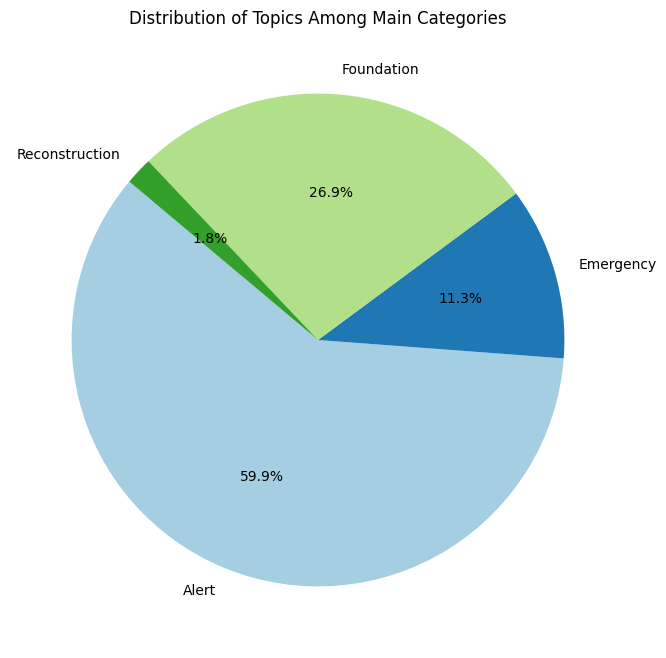

In [59]:
# Aggregate the topic counts by main category
category_counts = new_brick_map.groupby('Main Category')['Count'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Topics Among Main Categories')
plt.show()

<div style="background-color: rgba(144, 238, 144, 0.5); color: black; padding: 10px; border-radius: 5px;">
    <img src="./data/research.png" alt="Research Icon" width="25"/> <strong>Noteworthy Data Observation:</strong> 

The repetition of topic in this table can be seen on Count column which indicates that multiple users have taken the same topic and one topic can belong more than one brick. Each instance of a topic in the data represents an enrollment, so seeing the same topic listed multiple times suggests that it has been taken by multiple users. That's why for example we have 1190 count for Alert Brick.

To get a clearer picture, we aggregated the data to show the unique topic along with the count of users who have taken each topic.</div>

In [60]:
# Count the categories for each Brick
category_counts

Main Category
Alert             1190
Emergency          225
Foundation         535
Reconstruction      36
Name: Count, dtype: int64

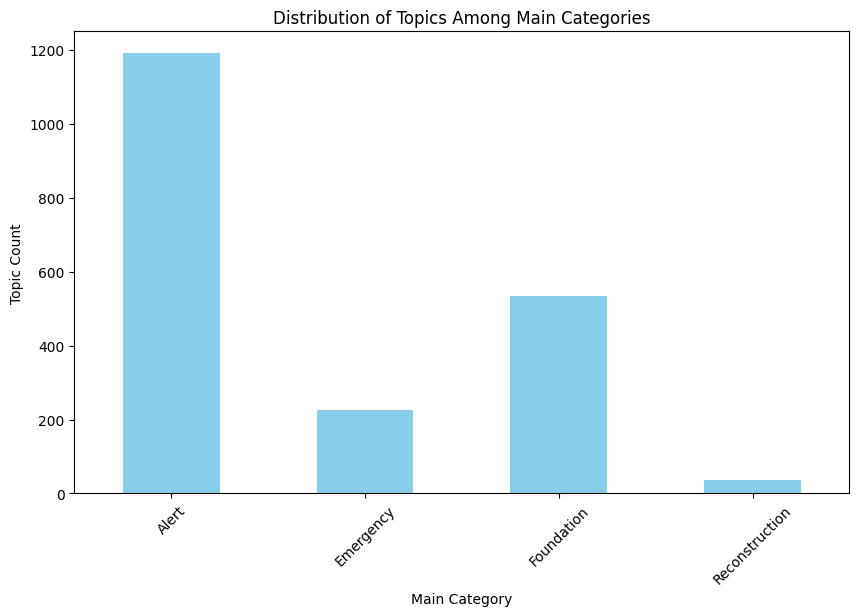

In [61]:
# Plotting the bar chart for Count of Topics Among Main Categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Main Category')
plt.ylabel('Topic Count')
plt.title('Distribution of Topics Among Main Categories')
plt.xticks(rotation=45)
plt.show()

In [62]:
# Aggregate the brick counts
brick_counts = new_brick_map.groupby('Brick')['Count'].sum().sort_values(ascending=False)
brick_counts

Brick
Contingency planning             217
Personal biosecurity             205
Surveillance                     200
Sampling                         200
Farm biosecurity                 200
Clinical Examination             195
Restricted zones                 195
Awareness                        195
Epidemiological Investigation    195
Laboratories                     117
Recovery of disease status        18
Vaccination                       18
Vaccination exit strategy         18
Psychological support              4
Humane killing of animals          4
Communication                      4
Simulation exercises               1
Name: Count, dtype: int64

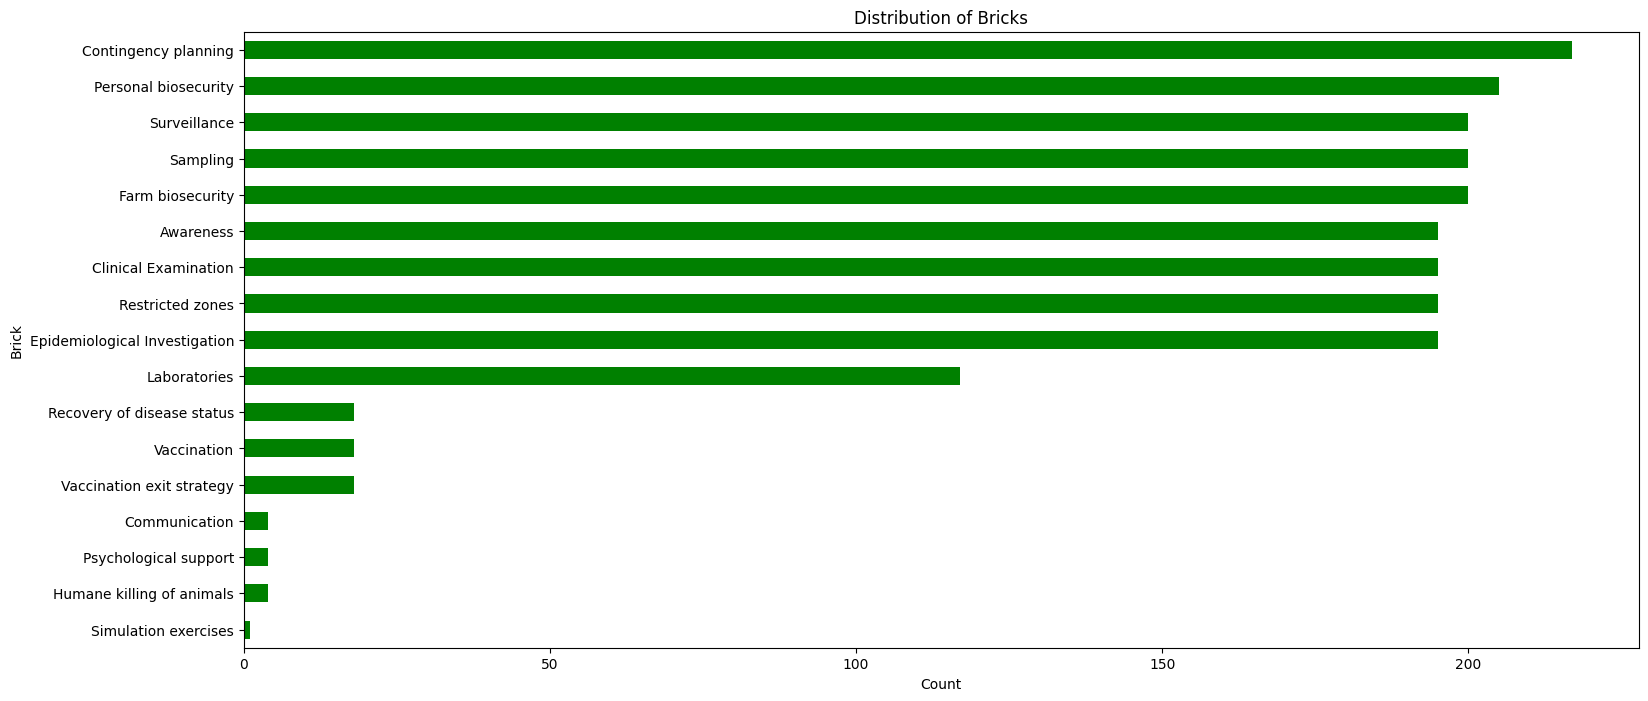

In [63]:
# Plotting the bar chart with bricks vs topic counts that associated to that brick
plt.figure(figsize=(18, 8))
brick_counts.sort_values(ascending=True).plot(kind='barh', color='green')
plt.ylabel('Brick')
plt.xlabel('Count')
plt.title('Distribution of Bricks')
plt.show()


/var/folders/t3/j6bxkcns4fg5jmpk0m7bc3580000gn/T/ipykernel_25347/4073473183.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Topic', data=topic_counts, palette='viridis', legend=False)


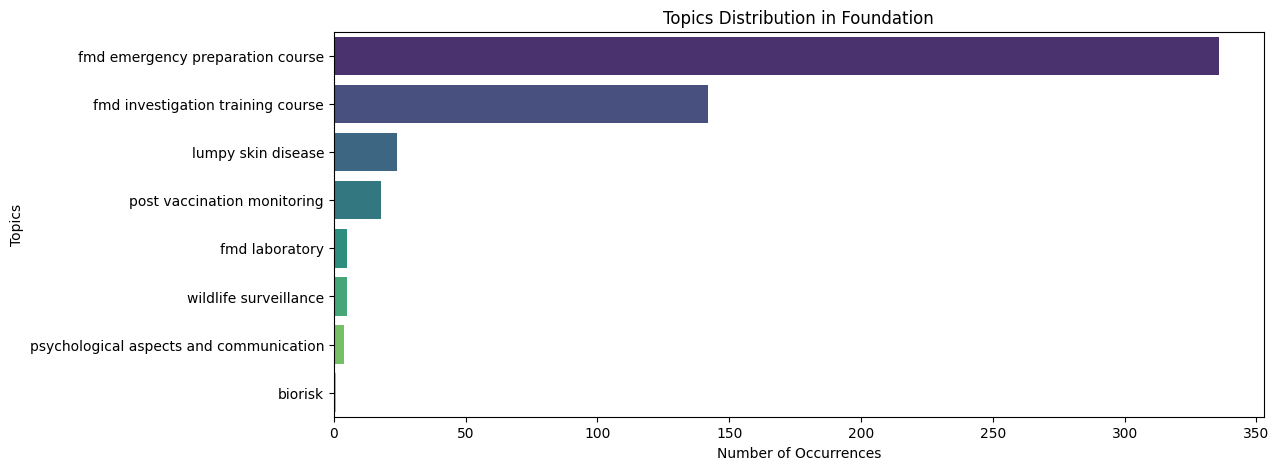

/var/folders/t3/j6bxkcns4fg5jmpk0m7bc3580000gn/T/ipykernel_25347/4073473183.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Topic', data=topic_counts, palette='viridis', legend=False)


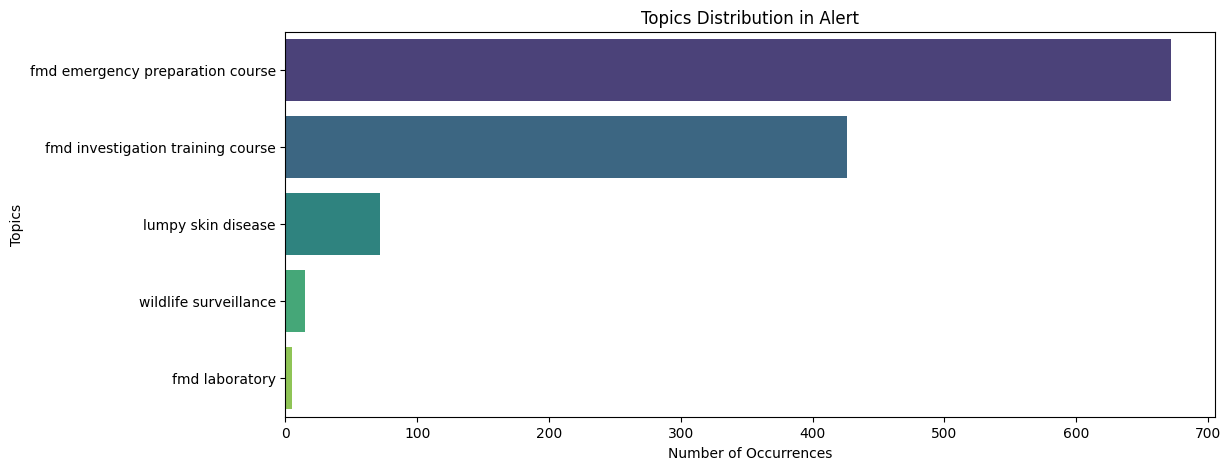

/var/folders/t3/j6bxkcns4fg5jmpk0m7bc3580000gn/T/ipykernel_25347/4073473183.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Topic', data=topic_counts, palette='viridis', legend=False)


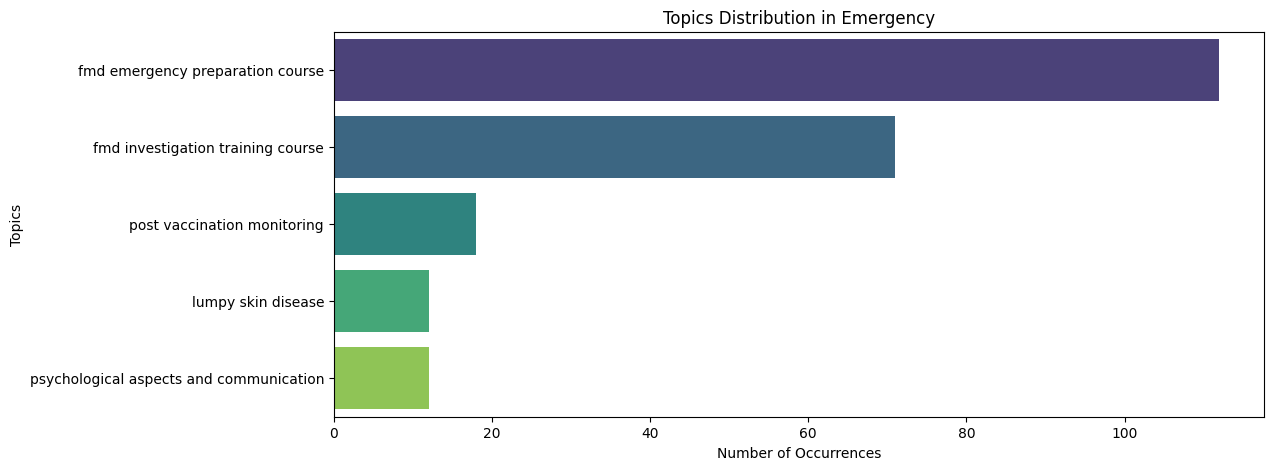

/var/folders/t3/j6bxkcns4fg5jmpk0m7bc3580000gn/T/ipykernel_25347/4073473183.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Topic', data=topic_counts, palette='viridis', legend=False)


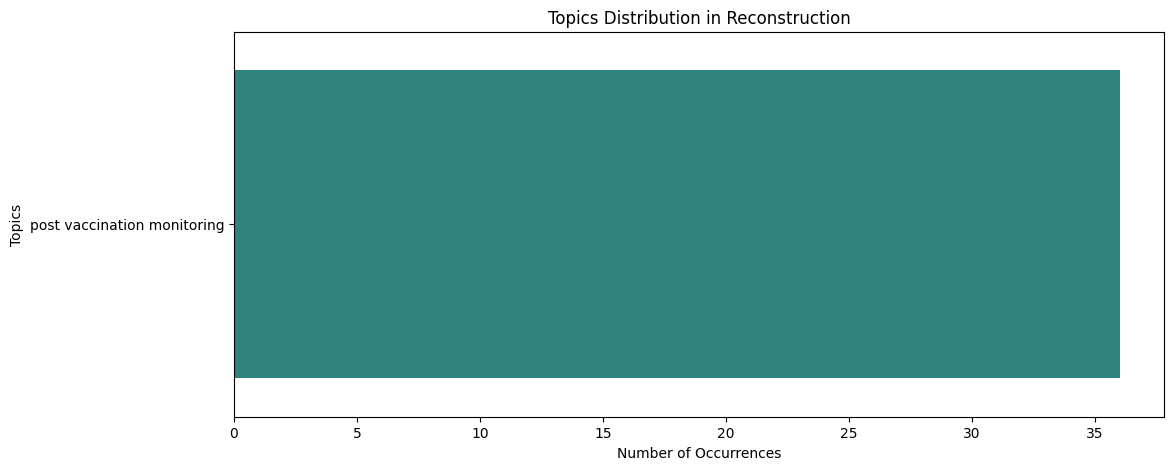

In [64]:
# Main categories list
main_categories = new_brick_map['Main Category'].unique()

# Bar chart
for category in main_categories:
    # Filter for the current main category
    category_df = new_brick_map[new_brick_map['Main Category'] == category]
    
    # Count the occurrences of each topic
    topic_counts = category_df.groupby('Topic')['Count'].sum().reset_index().sort_values(by='Count', ascending=False)
    
    # Plot the bar chart
    plt.figure(figsize=(12, 5))
    sns.barplot(x='Count', y='Topic', data=topic_counts, palette='viridis', legend=False)
    plt.title(f'Topics Distribution in {category}')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Topics')
    plt.show()

<Figure size 2000x1200 with 0 Axes>

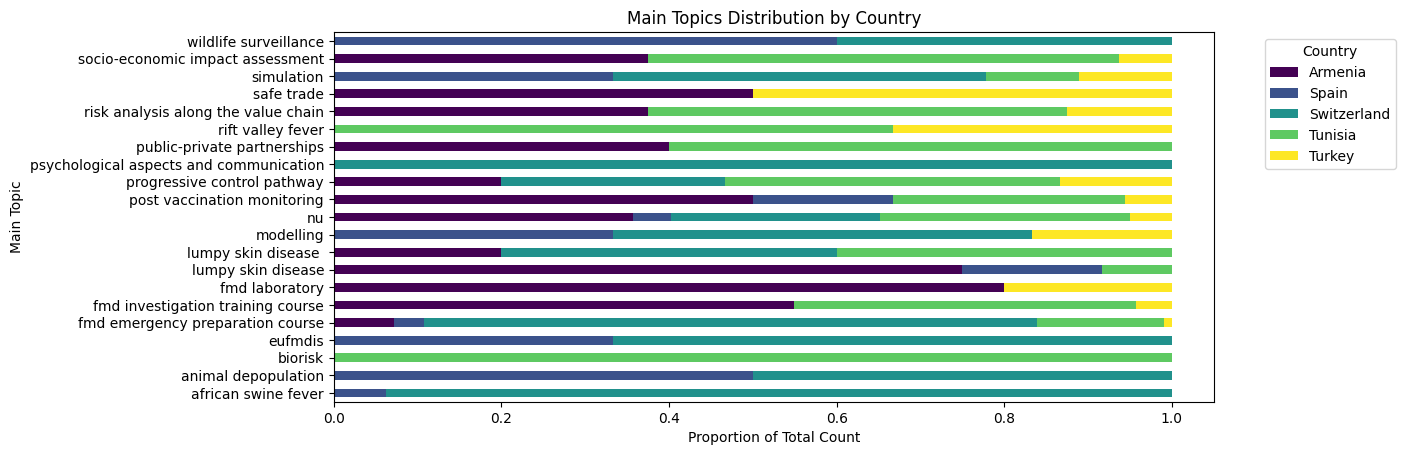

In [65]:
# Aggregate the total count for each topic
total_topic_counts = merge_master_enrolments_bricks.groupby('main_topic').size().reset_index(name='Total Count')

# Calculate counts per country and topic
country_topic_counts = merge_master_enrolments_bricks.groupby(['country', 'main_topic']).size().reset_index(name='Count')

# Pivot the data for easier plotting
pivot_country_topic_counts = country_topic_counts.pivot(index='main_topic', columns='country', values='Count').fillna(0)

# Normalize the data by total counts for each topic
normalized_data = pivot_country_topic_counts.div(total_topic_counts.set_index('main_topic')['Total Count'], axis=0)

# Plot
plt.figure(figsize=(20, 12))
ax = normalized_data.plot(kind='barh', stacked=True, colormap='viridis')

# Add labels and title
plt.xlabel('Proportion of Total Count')
plt.ylabel('Main Topic')
plt.title('Main Topics Distribution by Country')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.subplots_adjust(right=1.5)

plt.show()

### **Another way to plot the Main Topic Distribution by Country:**

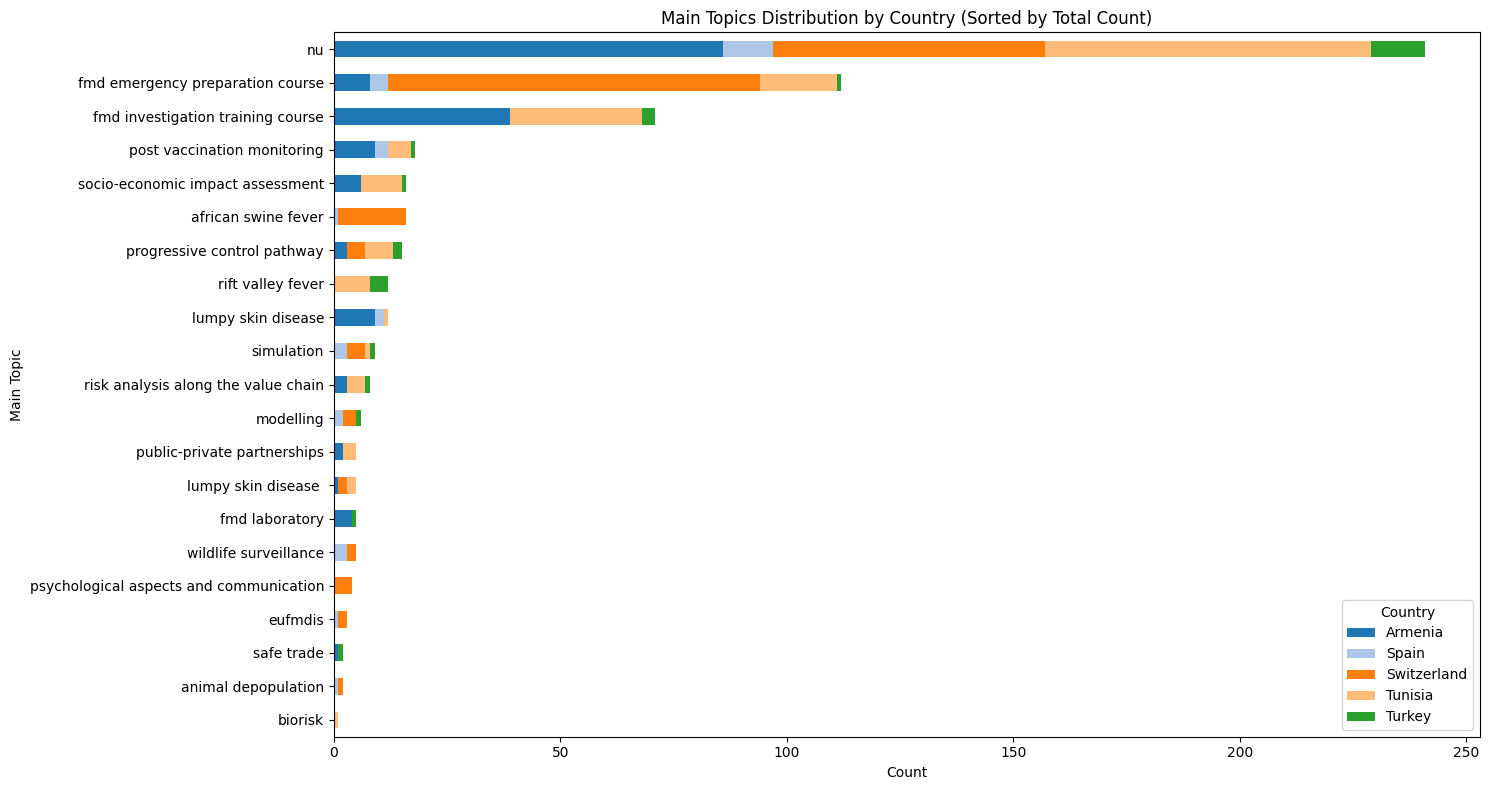

In [66]:
# Sort the topics by total counts
sorted_topics = total_topic_counts.sort_values(by='Total Count', ascending=True)['main_topic']
pivot_country_topic_counts = pivot_country_topic_counts.loc[sorted_topics]

# Define a color palette with tab20
colors = sns.color_palette("tab20", len(pivot_country_topic_counts.columns))

# Plot
plt.figure(figsize=(15, 8))

# Plot each country as a stacked bar
pivot_country_topic_counts.plot(kind='barh', stacked=True, color=colors, ax=plt.gca())

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Main Topic')
plt.title('Main Topics Distribution by Country (Sorted by Total Count)')
plt.legend(title='Country')
plt.tight_layout()

plt.show()

### 1. Country EDA: Armenia

In [67]:
main_topics_armenia = merge_master_enrolments_bricks[
    merge_master_enrolments_bricks['country'] == 'Armenia'
    ].groupby('main_topic').size().sort_values(ascending=False)

In [68]:
bricks_armenia = merge_master_enrolments_bricks[
    merge_master_enrolments_bricks['country'] == 'Armenia'
    ].filter(regex=r'^(Foundation:|Alert:|Emergency:|Reconstruction:)',
             axis=1).sum().sort_values(ascending=False)

In [69]:
# Remove topics with 0 value and sort from highest to lowest for plotting
main_topics_armenia = main_topics_armenia[main_topics_armenia > 0].sort_values(ascending=True)
bricks_armenia = bricks_armenia[bricks_armenia > 0].sort_values(ascending=True)

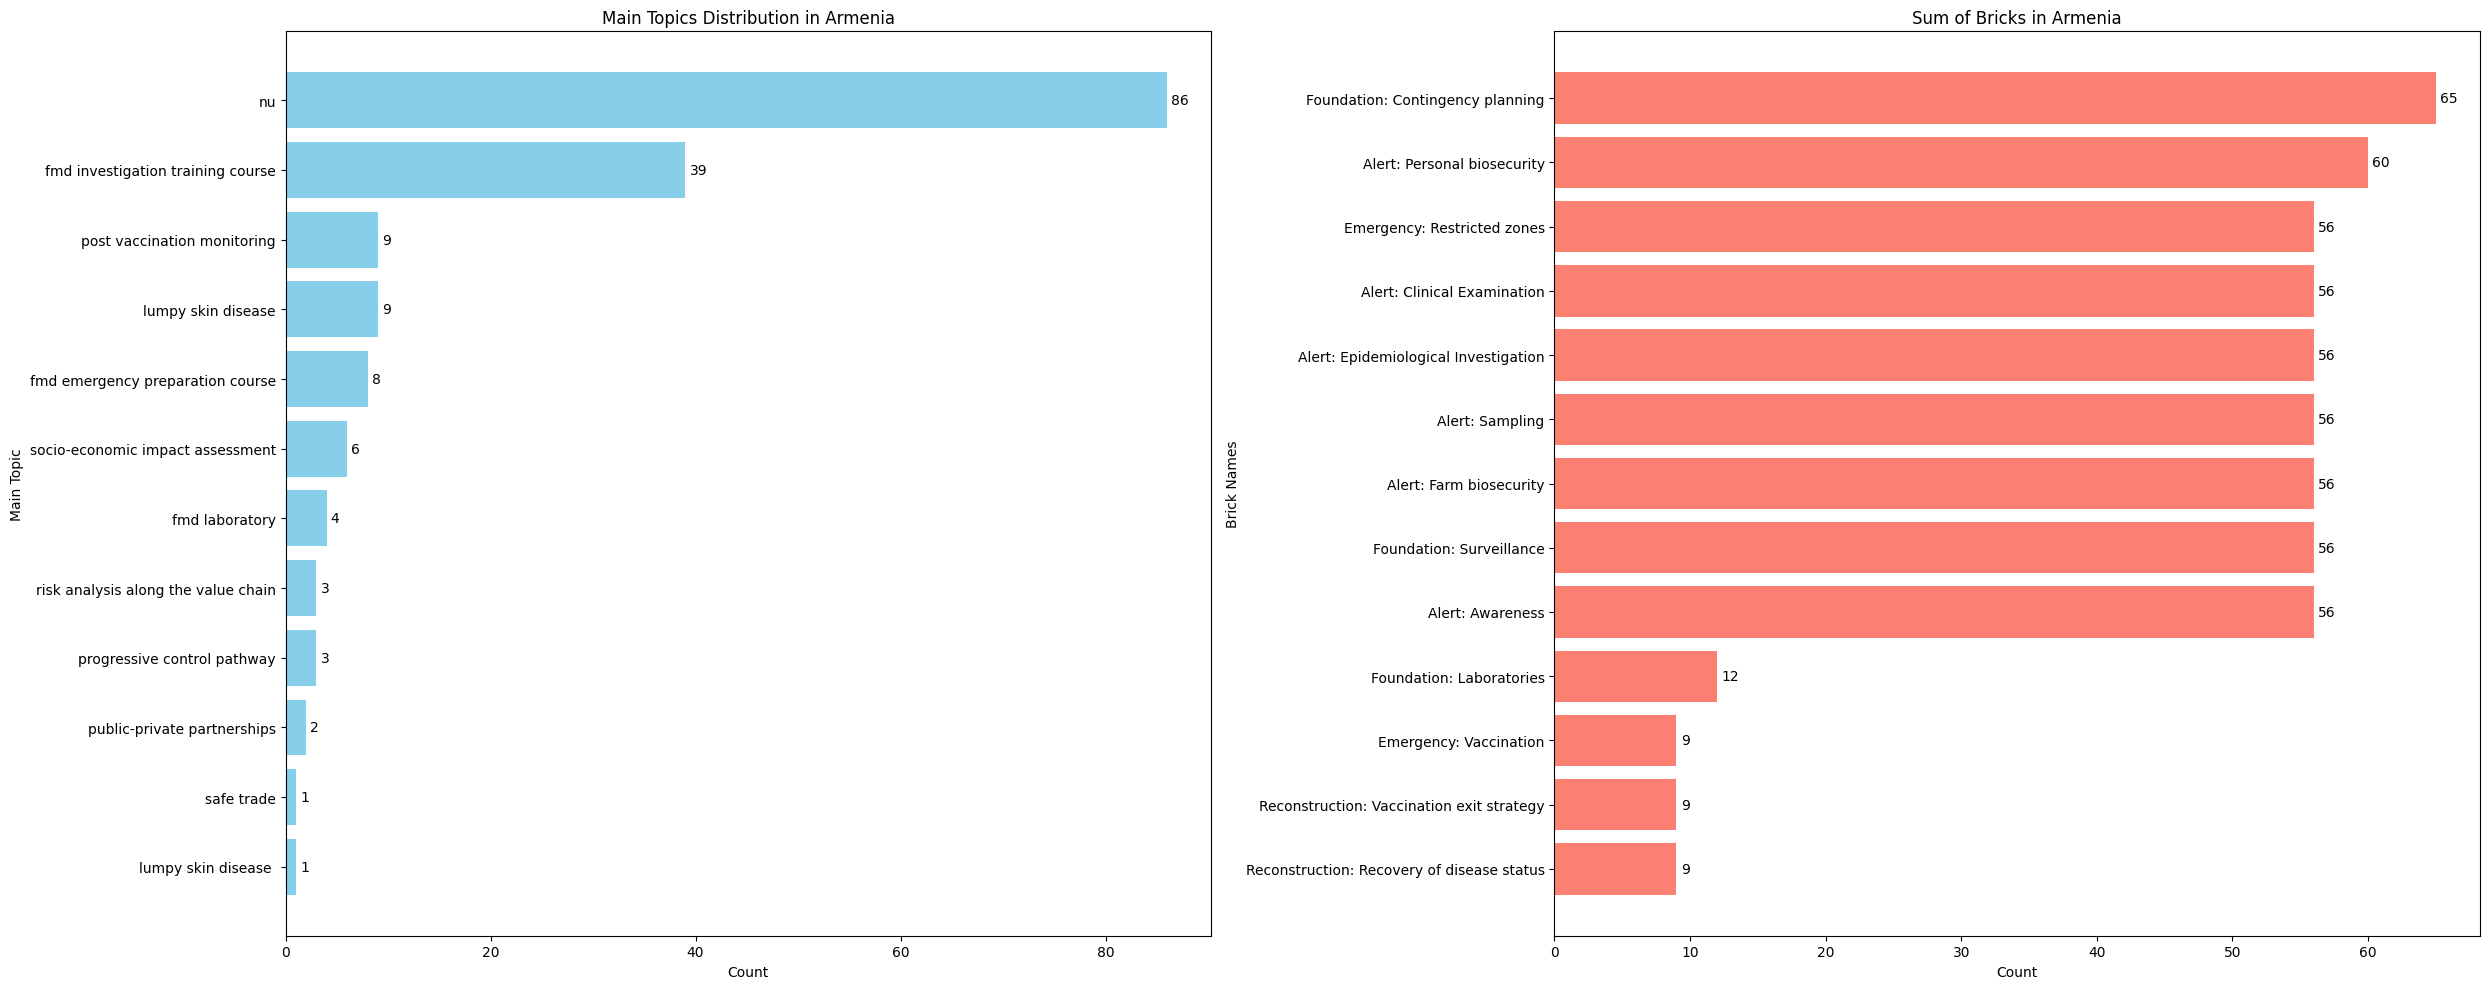

In [70]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(25, 10))

# Plot main topics count
bars1 = axs[0].barh(main_topics_armenia.index, main_topics_armenia.values, color='skyblue')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Main Topic')
axs[0].set_title('Main Topics Distribution in Armenia')

# Add count labels on top of bars
for bar in bars1:
    width = bar.get_width()
    axs[0].annotate(f'{int(width)}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords='offset points',
                    ha='left', va='center')

# Plot summed brick values
bars2 = axs[1].barh(bricks_armenia.index, bricks_armenia.values, color='salmon')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Brick Names')
axs[1].set_title('Sum of Bricks in Armenia')

# Add count labels on top of bars
for bar in bars2:
    width = bar.get_width()
    axs[1].annotate(f'{int(width)}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords='offset points',
                    ha='left', va='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 2. Country EDA: Turkey

In [71]:
main_topics_turkey = merge_master_enrolments_bricks[
    merge_master_enrolments_bricks['country'] == 'Turkey'
    ].groupby('main_topic').size().sort_values(ascending=False)

In [72]:
bricks_turkey = merge_master_enrolments_bricks[
    merge_master_enrolments_bricks['country'] == 'Turkey'
    ].filter(regex=r'^(Foundation:|Alert:|Emergency:|Reconstruction:)', 
             axis=1).sum().sort_values(ascending=False)

In [73]:
# Remove topics with 0 value and sort from highest to lowest for plotting
main_topics_turkey = main_topics_turkey[main_topics_turkey > 0].sort_values(ascending=True)
bricks_turkey = bricks_turkey[bricks_turkey > 0].sort_values(ascending=True)

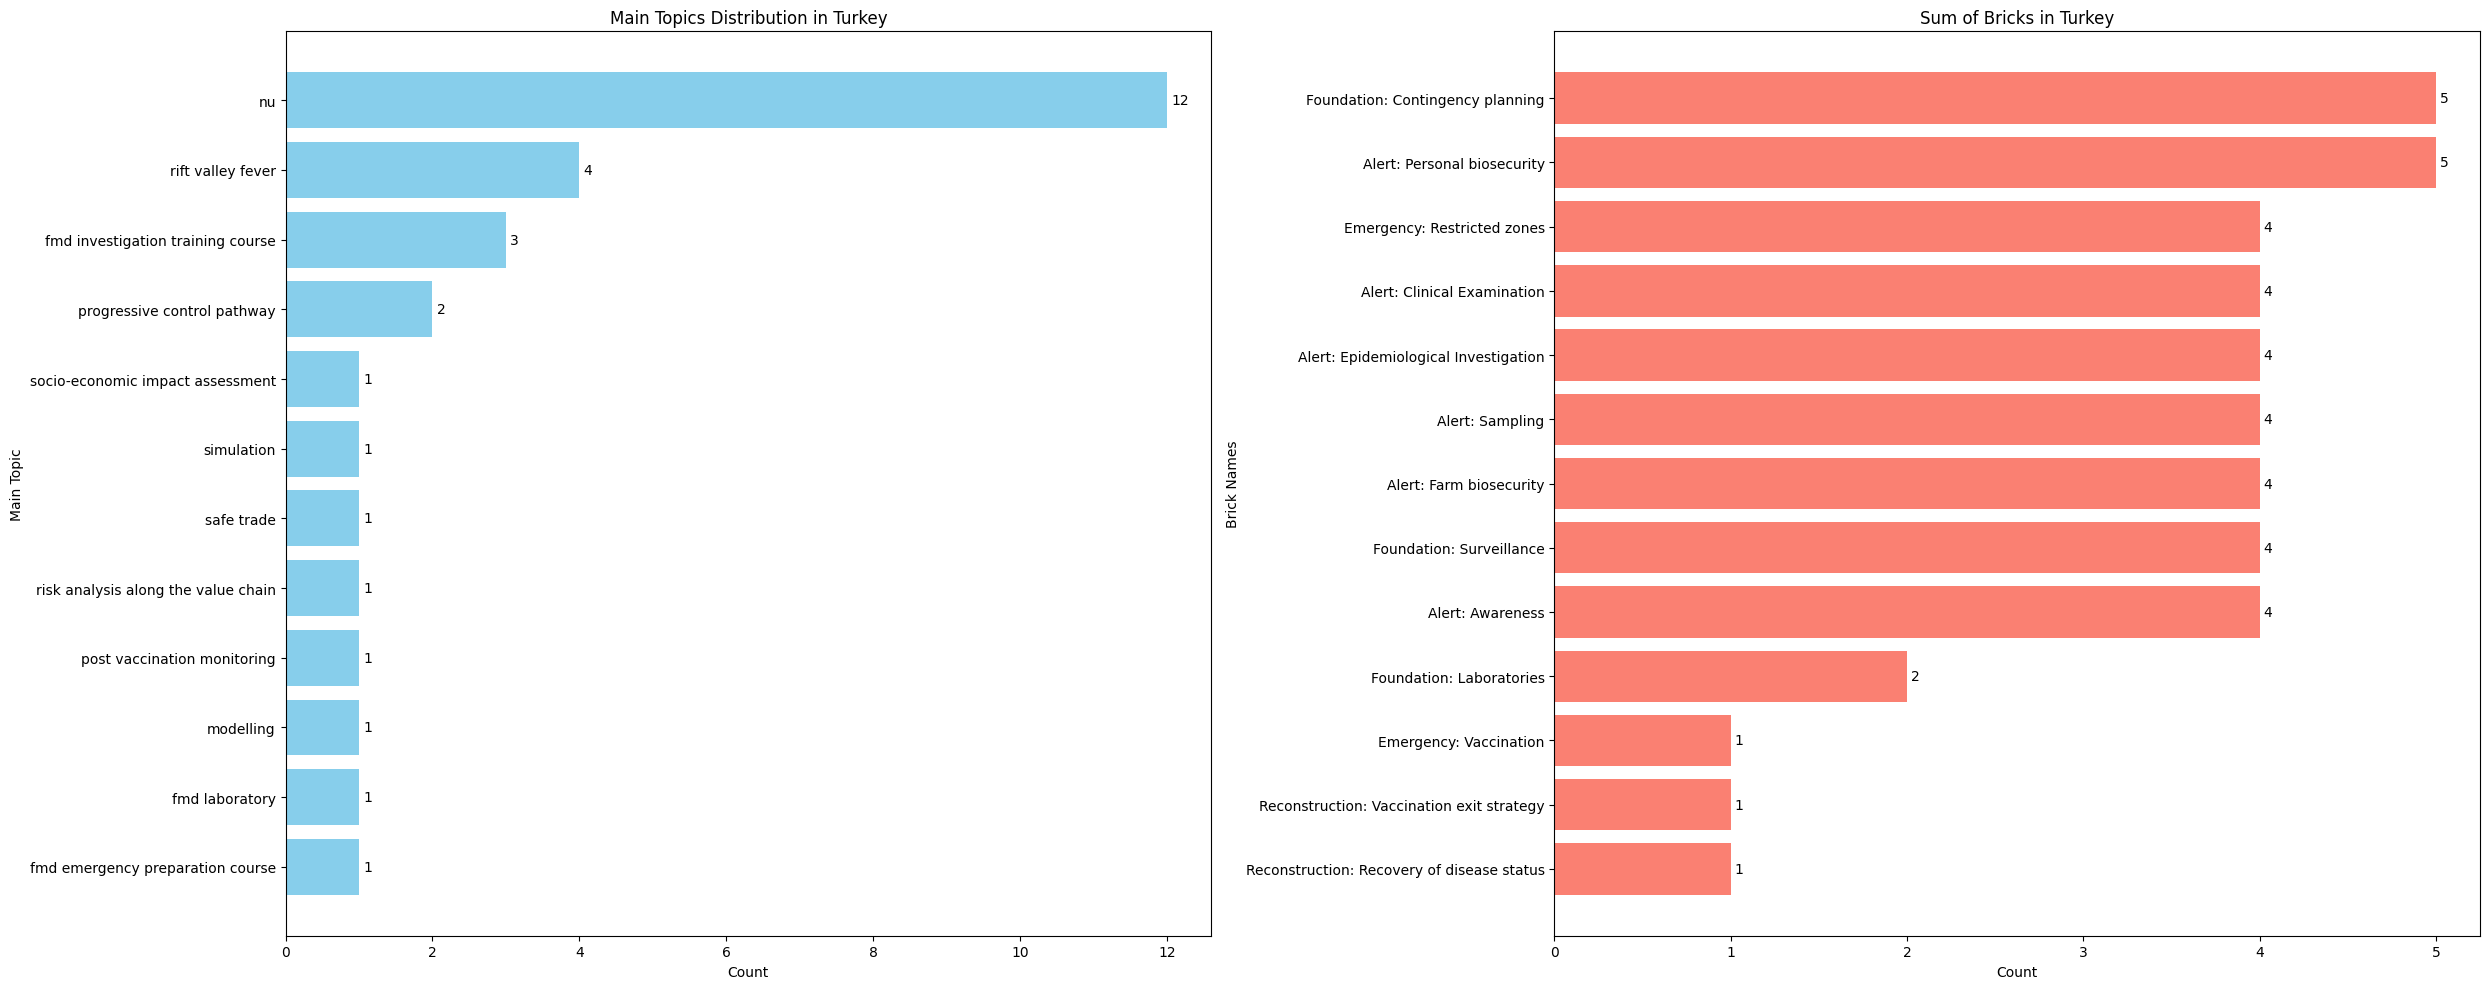

In [74]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(25, 10))

# Plot main topics count
bars1 = axs[0].barh(main_topics_turkey.index, main_topics_turkey.values, color='skyblue')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Main Topic')
axs[0].set_title('Main Topics Distribution in Turkey')

# Add count labels on top of bars
for bar in bars1:
    width = bar.get_width()
    axs[0].annotate(f'{int(width)}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords='offset points',
                    ha='left', va='center')

# Plot summed brick values
bars2 = axs[1].barh(bricks_turkey.index, bricks_turkey.values, color='salmon')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Brick Names')
axs[1].set_title('Sum of Bricks in Turkey')

# Add count labels on top of bars
for bar in bars2:
    width = bar.get_width()
    axs[1].annotate(f'{int(width)}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords='offset points',
                    ha='left', va='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 3. Country EDA: Spain

In [75]:
main_topics_spain = merge_master_enrolments_bricks[
    merge_master_enrolments_bricks['country'] == 'Spain'
    ].groupby('main_topic').size().sort_values(ascending=False)

In [76]:
bricks_spain = merge_master_enrolments_bricks[
    merge_master_enrolments_bricks['country'] == 'Spain'
    ].filter(regex=r'^(Foundation:|Alert:|Emergency:|Reconstruction:)', 
             axis=1).sum().sort_values(ascending=False)

In [77]:
# Remove topics with 0 value and sort from highest to lowest for plotting
main_topics_spain = main_topics_spain[main_topics_spain > 0].sort_values(ascending=True)
bricks_spain = bricks_spain[bricks_spain > 0].sort_values(ascending=True)

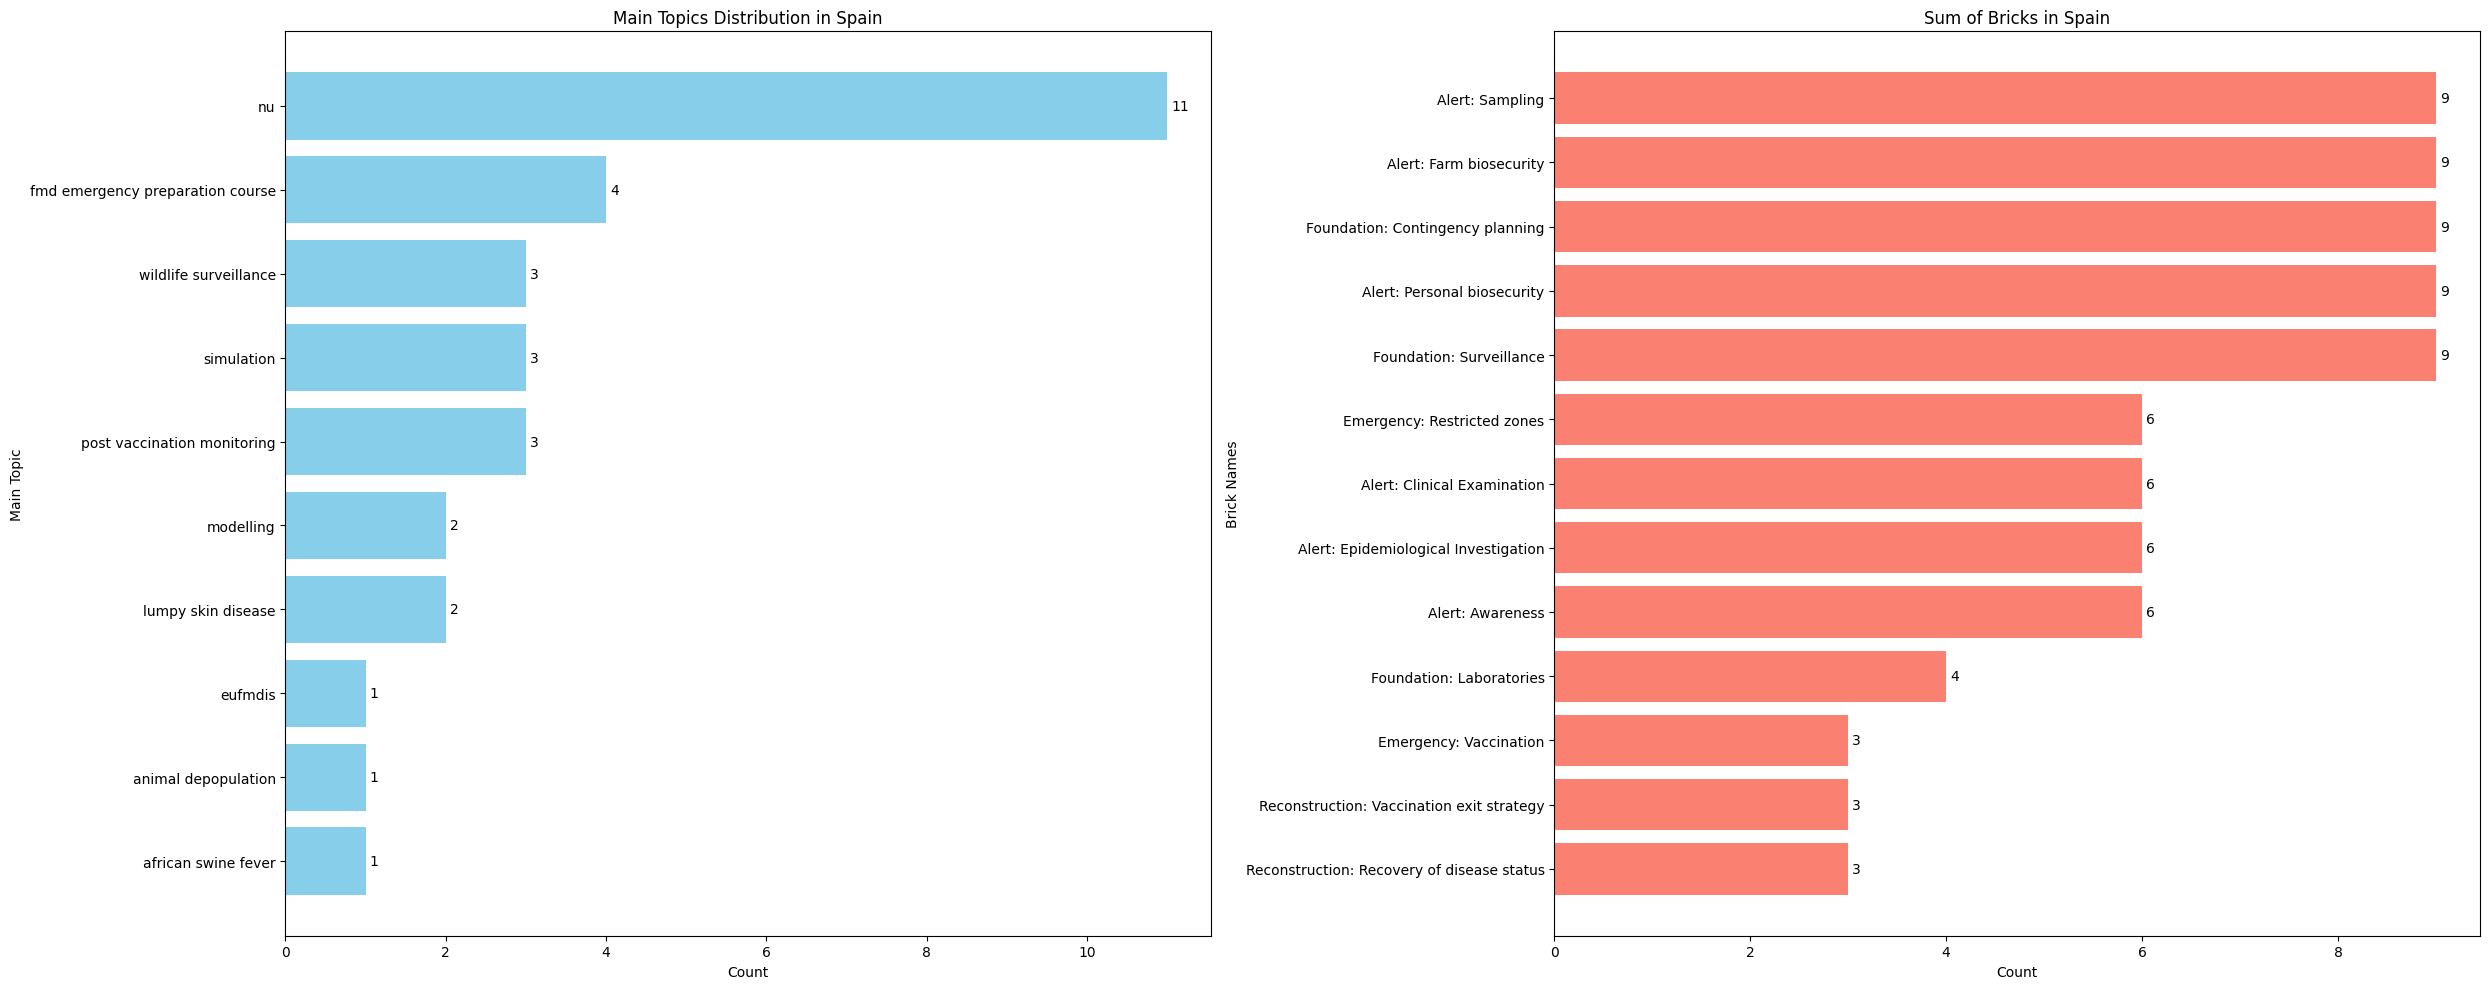

In [78]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(25, 10))

# Plot main topics count
bars1 = axs[0].barh(main_topics_spain.index, main_topics_spain.values, color='skyblue')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Main Topic')
axs[0].set_title('Main Topics Distribution in Spain')

# Add count labels on top of bars
for bar in bars1:
    width = bar.get_width()
    axs[0].annotate(f'{int(width)}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords='offset points',
                    ha='left', va='center')

# Plot summed brick values
bars2 = axs[1].barh(bricks_spain.index, bricks_spain.values, color='salmon')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Brick Names')
axs[1].set_title('Sum of Bricks in Spain')

# Add count labels on top of bars
for bar in bars2:
    width = bar.get_width()
    axs[1].annotate(f'{int(width)}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords='offset points',
                    ha='left', va='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 4. Country EDA: Switzerland

In [79]:
main_topics_switzerland = merge_master_enrolments_bricks[
    merge_master_enrolments_bricks['country'] == 'Switzerland'
    ].groupby('main_topic').size().sort_values(ascending=False)

In [80]:
bricks_switzerland = merge_master_enrolments_bricks[
    merge_master_enrolments_bricks['country'] == 'Switzerland'
    ].filter(regex=r'^(Foundation:|Alert:|Emergency:|Reconstruction:)', 
             axis=1).sum().sort_values(ascending=False)

In [81]:
# Remove topics with 0 value and sort from highest to lowest for plotting
main_topics_switzerland = main_topics_switzerland[main_topics_switzerland > 0].sort_values(ascending=True)
bricks_switzerland = bricks_switzerland[bricks_switzerland > 0].sort_values(ascending=True)

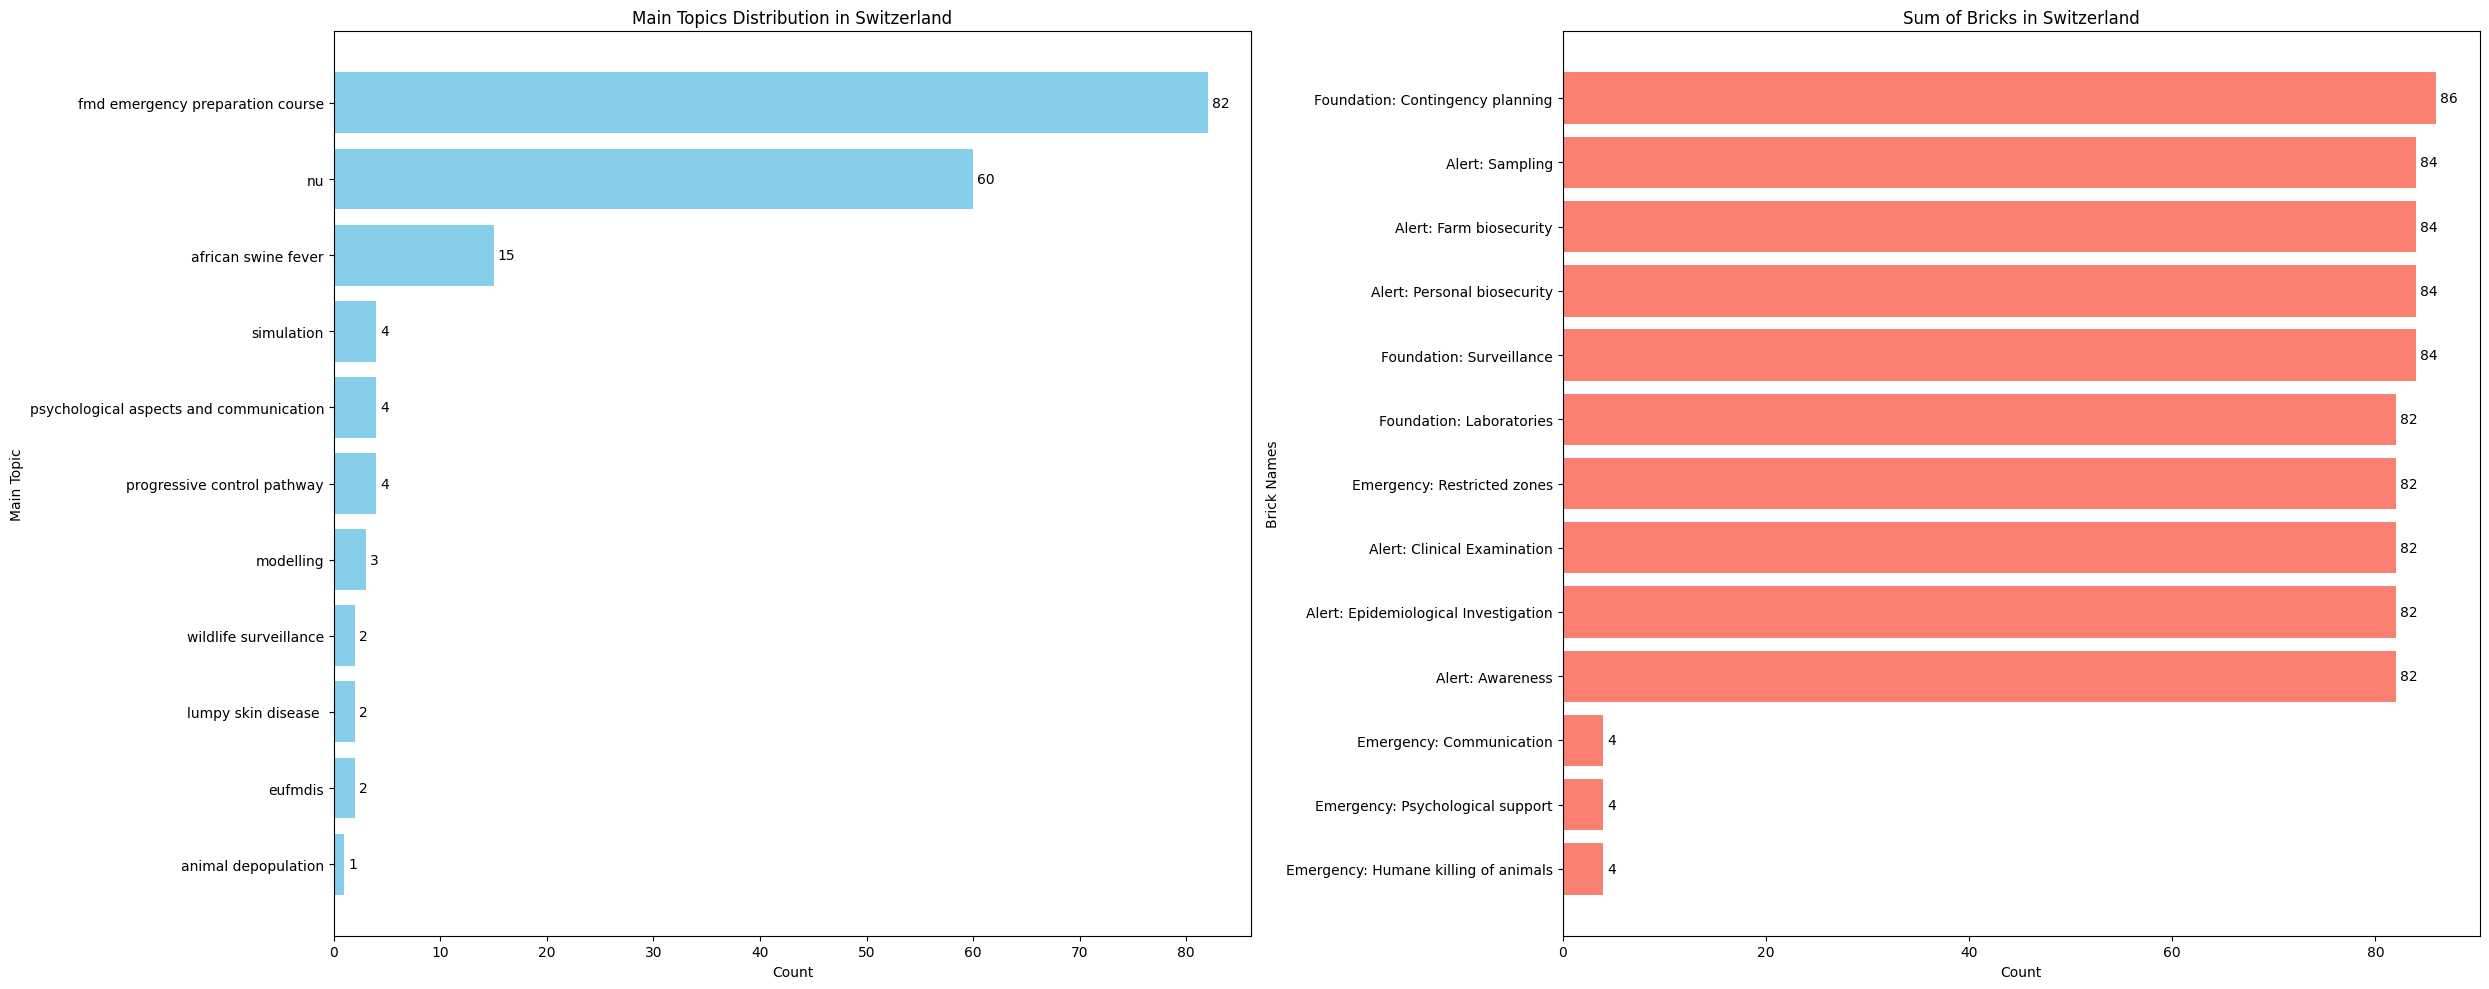

In [82]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(25, 10))

# Plot main topics count
bars1 = axs[0].barh(main_topics_switzerland.index, main_topics_switzerland.values, color='skyblue')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Main Topic')
axs[0].set_title('Main Topics Distribution in Switzerland')

# Add count labels on top of bars
for bar in bars1:
    width = bar.get_width()
    axs[0].annotate(f'{int(width)}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords='offset points',
                    ha='left', va='center')

# Plot summed brick values
bars2 = axs[1].barh(bricks_switzerland.index, bricks_switzerland.values, color='salmon')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Brick Names')
axs[1].set_title('Sum of Bricks in Switzerland')

# Add count labels on top of bars
for bar in bars2:
    width = bar.get_width()
    axs[1].annotate(f'{int(width)}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords='offset points',
                    ha='left', va='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 5. Country EDA: Tunisia

In [83]:
main_topics_tunisia = merge_master_enrolments_bricks[
    merge_master_enrolments_bricks['country'] == 'Tunisia'
    ].groupby('main_topic').size().sort_values(ascending=False)

In [84]:
bricks_tunisia = merge_master_enrolments_bricks[
    merge_master_enrolments_bricks['country'] == 'Tunisia'
    ].filter(regex=r'^(Foundation:|Alert:|Emergency:|Reconstruction:)', 
             axis=1).sum().sort_values(ascending=False)

In [85]:
# Remove topics with 0 value and sort from highest to lowest for plotting
main_topics_tunisia = main_topics_tunisia[main_topics_tunisia > 0].sort_values(ascending=True)
bricks_tunisia = bricks_tunisia[bricks_tunisia > 0].sort_values(ascending=True)

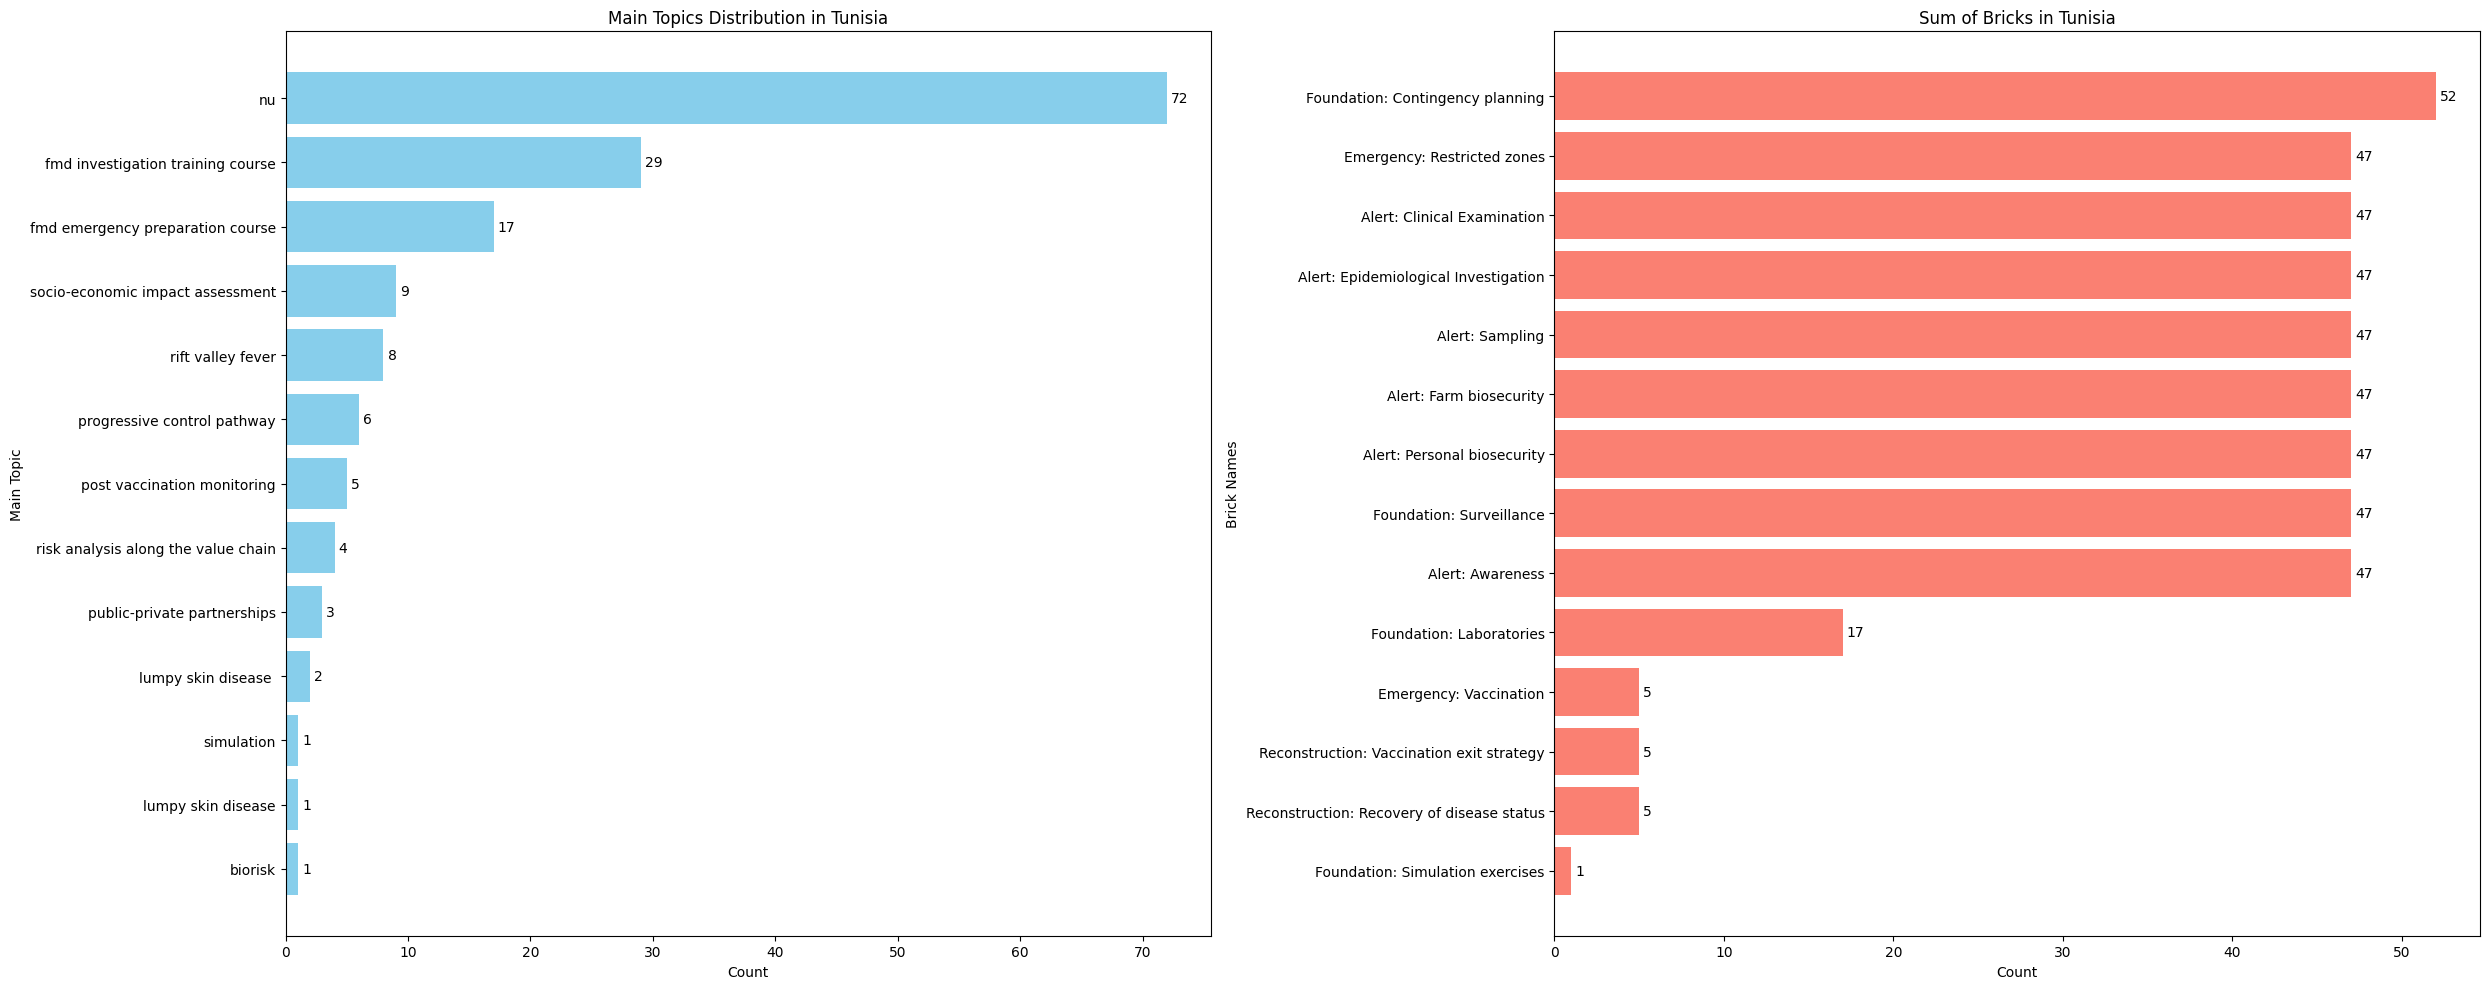

In [86]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(25, 10))

# Plot main topics count
bars1 = axs[0].barh(main_topics_tunisia.index, main_topics_tunisia.values, color='skyblue')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Main Topic')
axs[0].set_title('Main Topics Distribution in Tunisia')

# Add count labels on top of bars
for bar in bars1:
    width = bar.get_width()
    axs[0].annotate(f'{int(width)}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords='offset points',
                    ha='left', va='center')

# Plot summed brick values
bars2 = axs[1].barh(bricks_tunisia.index, bricks_tunisia.values, color='salmon')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Brick Names')
axs[1].set_title('Sum of Bricks in Tunisia')

# Add count labels on top of bars
for bar in bars2:
    width = bar.get_width()
    axs[1].annotate(f'{int(width)}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords='offset points',
                    ha='left', va='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# <img src="./data/correlation.png" alt="rs Icon" width="30"/> **Collaborative Filtering Recommender System**

### **Introduction**

We aim to create a collaborative filtering recommender system for an e-learning platform. This system will suggest relevant course "bricks" to users based on their enrolment history and similarity with other users. The collaborative filtering approach leverages user interaction data to make recommendations, assuming that users who have interacted with similar items in the past will have similar preferences.

### **Movitavtion**

We followed this structure because the Country Managers want their veterinarians to complete all bricks. By providing personalized recommendations, we can help users discover relevant courses they have not yet completed, thus promoting comprehensive training.

## 1. Data Preparation

First, we clean and prepare the data for analysis by removing unnecessary columns that are not relevant to the recommendation process for now.

### **Why this step?**

- **Focus on relevant features:** By dropping irrelevant columns, we focus on the data that will contribute to building the recommendation model, reducing noise and improving model performance.
- **Simplify data:** Streamlining the data structure makes it easier to manipulate and analyze.

In [87]:
# Display basic information about the dataset
merge_master_enrolments_bricks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 61 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   id                                                         568 non-null    int64  
 1   full_name                                                  568 non-null    object 
 2   email                                                      568 non-null    object 
 3   course_fullname                                            568 non-null    object 
 4   course_shortname                                           568 non-null    object 
 5   course_category                                            568 non-null    object 
 6   city                                                       568 non-null    object 
 7   country                                                    568 non-null    object 
 8   institutio

In [88]:
# List of columns to drop
columns_to_drop = ['email', 'city', 'institution', 'role', 'completed', 'time_enrolled', 
                   'time_completed', 'status', 'new_id', 'moodle_id', 'shortname', 'fullname', 
                   'format', 'level', 'edition', 'pillar', 'Disease covered']

# Drop the unnecessary columns
final_RS = merge_master_enrolments_bricks.drop(columns_to_drop, axis=1)

In [89]:
# Display the modified dataframe
final_RS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 44 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   id                                                         568 non-null    int64  
 1   full_name                                                  568 non-null    object 
 2   course_fullname                                            568 non-null    object 
 3   course_shortname                                           568 non-null    object 
 4   course_category                                            568 non-null    object 
 5   country                                                    568 non-null    object 
 6   progress                                                   568 non-null    float64
 7   course_id                                                  568 non-null    float64
 8   moodle_cat

## 2. Brick Mapping

Next, we create a mapping between bricks and their associated topics to facilitate recommendation of not just the bricks but also the topics covered by them.

### **Why this step?**

- **Topic association:** It allows us to associate bricks with their main topics, providing richer recommendations that include detailed content descriptions.
- **Data organization:** Structuring data in this way makes it easier to access and use in later stages of the recommendation process.

In [90]:
# Display the brick_mapping dataframe
brick_mapping.head()

,main_topic,Disease covered,Foundation: Simulation exercises,Foundation: Training,Foundation: Laboratories,Foundation: Contingency planning,Foundation: Assessment,"Foundation: Identification, Registration and traceability",Foundation: Risk assessment,Foundation: Information data management,...,Emergency: Restricted zones,Emergency: Psychological support,Emergency: Resource and impact tools and calculators,Emergency: Logistic,Emergency: National emergency anagement,Emergency: Coordination and PPP,Emergency: Wildlife,Reconstruction: Recovery of disease status,Reconstruction: Vaccination exit strategy,Reconstruction: Re-stocking
0,african animal trypanosomosis,FAST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,african swine fever,FMD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,animal depopulation,FAST,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,biorisk,FMD,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,epidemiology,Single Disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# Check for missing values in brick_mapping
brick_mapping.isna().sum()

main_topic                                                   0
Disease covered                                              8
Foundation: Simulation exercises                             0
Foundation: Training                                         0
Foundation: Laboratories                                     0
Foundation: Contingency planning                             0
Foundation: Assessment                                       0
Foundation: Identification, Registration and traceability    0
Foundation: Risk assessment                                  0
Foundation: Information data management                      0
Foundation: Models                                           0
Foundation: Surveillance                                     0
Alert: Awareness                                             0
Alert: Clinical Examination                                  0
Alert: Epidemiological Investigation                         0
Alert: Sampling                                        

In [92]:
# Remove the 'Disease covered' column
brick_mapping.drop(columns=['Disease covered'], inplace=True)

# Set 'main_topic' as the index for easy access
brick_mapping.set_index('main_topic', inplace=True)

In [93]:
brick_mapping.isna().sum()

Foundation: Simulation exercises                             0
Foundation: Training                                         0
Foundation: Laboratories                                     0
Foundation: Contingency planning                             0
Foundation: Assessment                                       0
Foundation: Identification, Registration and traceability    0
Foundation: Risk assessment                                  0
Foundation: Information data management                      0
Foundation: Models                                           0
Foundation: Surveillance                                     0
Alert: Awareness                                             0
Alert: Clinical Examination                                  0
Alert: Epidemiological Investigation                         0
Alert: Sampling                                              0
Alert: Farm biosecurity                                      0
Alert: Personal biosecurity                            

In [94]:
# Create a dictionary mapping each brick to its associated topics
brick_to_topics = {}
for brick in brick_mapping.columns:
    brick_to_topics[brick] = brick_mapping[brick_mapping[brick] == 1].index.tolist()

In [95]:
# Convert the dictionary to a list of dictionaries for easier conversion to df
list_of_dicts = [{'Brick': brick, 'Topics': topics} for brick, topics in brick_to_topics.items()]

# Display the list of dictionaries
for item in list_of_dicts:
    print(item)

{'Brick': 'Foundation: Simulation exercises', 'Topics': ['biorisk', 'poultry investigation', 'simulation ']}
{'Brick': 'Foundation: Training', 'Topics': []}
{'Brick': 'Foundation: Laboratories', 'Topics': ['fmd emergency preparation course', 'fmd laboratory', 'capripox laboratory', 'rvf laboratory']}
{'Brick': 'Foundation: Contingency planning', 'Topics': ['animal depopulation ', 'fmd emergency preparation course', 'fmd investigation training course', 'lumpy skin disease', 'passive surveillance', 'post vaccination monitoring', 'psychological aspects and communication', 'rift valley fever ', 'simulation ', 'spgp ']}
{'Brick': 'Foundation: Assessment', 'Topics': []}
{'Brick': 'Foundation: Identification, Registration and traceability', 'Topics': []}
{'Brick': 'Foundation: Risk assessment', 'Topics': []}
{'Brick': 'Foundation: Information data management', 'Topics': []}
{'Brick': 'Foundation: Models', 'Topics': []}
{'Brick': 'Foundation: Surveillance', 'Topics': ['fmd emergency preparatio

In [96]:
# Convert the list of dictionaries to a df
brick_to_topics_df = pd.DataFrame(list_of_dicts)
brick_to_topics_df

,Brick,Topics
0,Foundation: Simulation exercises,"[biorisk, poultry investigation, simulation ]"
1,Foundation: Training,[]
2,Foundation: Laboratories,"[fmd emergency preparation course, fmd laborat..."
3,Foundation: Contingency planning,"[animal depopulation , fmd emergency preparati..."
4,Foundation: Assessment,[]
5,"Foundation: Identification, Registration and t...",[]
6,Foundation: Risk assessment,[]
7,Foundation: Information data management,[]
8,Foundation: Models,[]
9,Foundation: Surveillance,"[fmd emergency preparation course, fmd investi..."


## 3. Creating the User-Item Matrix

We create a matrix where rows represent users and columns represent bricks. Each cell indicates whether a user has engaged with a particular brick.

### **Why this step?**

- **Matrix representation:** The user-item matrix is a fundamental structure in collaborative filtering. It captures the interactions between users and items (bricks) in a format suitable for similarity calculations and recommendations.
- **Data preparation:** Transforming the data into a matrix format is necessary for applying machine learning algorithms, particularly for computing similarities.

In [97]:
# Create a user-item matrix where rows are users and columns are bricks
bricks_columns = brick_to_topics_df['Brick'].tolist()
user_item_matrix = final_RS.pivot_table(index='id', values=bricks_columns, aggfunc='first').fillna(0)

In [98]:
# Display the user-item matrix
user_item_matrix

,Alert: Awareness,Alert: Clinical Examination,Alert: Epidemiological Investigation,Alert: Farm biosecurity,Alert: Personal biosecurity,Alert: Sampling,Emergency: Cleaning and disinfection,Emergency: Communication,Emergency: Coordination and PPP,Emergency: Disposal,...,Foundation: Information data management,Foundation: Laboratories,Foundation: Models,Foundation: Risk assessment,Foundation: Simulation exercises,Foundation: Surveillance,Foundation: Training,Reconstruction: Re-stocking,Reconstruction: Recovery of disease status,Reconstruction: Vaccination exit strategy
id,,,,,,,,,,,,,,,,,,,,,
49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6707,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6708,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 4. Standardization and Similarity Calculation

We standardize the user-item matrix and compute the cosine similarity between users.

### **Why this step?**

- **Standardization:** Standardizing the data ensures that each feature (brick) contributes equally to the similarity calculations, avoiding biases due to different scales.
- **Cosine similarity:** This metric is chosen because it measures the cosine of the angle between two vectors, effectively capturing the similarity in their direction. It is well-suited for high-dimensional sparse data, which is common in user-item interactions.


In [99]:
# Standardize the user-item matrix
scaler = StandardScaler()
user_item_matrix_scaled = scaler.fit_transform(user_item_matrix)

In [100]:
# Compute the cosine similarity matrix between users
user_similarity = cosine_similarity(user_item_matrix_scaled)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

In [101]:
# Display the user similarity matrix
user_similarity_df

id,49,50,51,52,53,54,55,56,57,58,...,6701,6702,6703,6704,6705,6706,6707,6708,6709,6710
id,,,,,,,,,,,,,,,,,,,,,
49,1.000000,1.000000,-0.948244,1.000000,1.000000,-0.910930,-0.910930,1.000000,-0.910930,1.000000,...,-0.948244,-0.948244,-0.948244,-0.948244,-0.948244,-0.948244,-0.948244,-0.948244,1.000000,-0.948244
50,1.000000,1.000000,-0.948244,1.000000,1.000000,-0.910930,-0.910930,1.000000,-0.910930,1.000000,...,-0.948244,-0.948244,-0.948244,-0.948244,-0.948244,-0.948244,-0.948244,-0.948244,1.000000,-0.948244
51,-0.948244,-0.948244,1.000000,-0.948244,-0.948244,0.840729,0.840729,-0.948244,0.840729,-0.948244,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.948244,1.000000
52,1.000000,1.000000,-0.948244,1.000000,1.000000,-0.910930,-0.910930,1.000000,-0.910930,1.000000,...,-0.948244,-0.948244,-0.948244,-0.948244,-0.948244,-0.948244,-0.948244,-0.948244,1.000000,-0.948244
53,1.000000,1.000000,-0.948244,1.000000,1.000000,-0.910930,-0.910930,1.000000,-0.910930,1.000000,...,-0.948244,-0.948244,-0.948244,-0.948244,-0.948244,-0.948244,-0.948244,-0.948244,1.000000,-0.948244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,-0.948244,-0.948244,1.000000,-0.948244,-0.948244,0.840729,0.840729,-0.948244,0.840729,-0.948244,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.948244,1.000000
6707,-0.948244,-0.948244,1.000000,-0.948244,-0.948244,0.840729,0.840729,-0.948244,0.840729,-0.948244,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.948244,1.000000
6708,-0.948244,-0.948244,1.000000,-0.948244,-0.948244,0.840729,0.840729,-0.948244,0.840729,-0.948244,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.948244,1.000000


## 5. Recommender Funtion

## **Why this step?**

- **Similarity-based recommendations:** The function uses the similarity scores to identify users with similar engagement patterns, leveraging their interactions to suggest new bricks.
- **Aggregation and filtering:** By aggregating the bricks completed by similar users and filtering out those already completed by the target user, we generate personalized recommendations.
- **Topic enrichment:** Associating recommended bricks with their topics provides richer context to the recommendations, enhancing the user's learning experience.

In [102]:
# Define the recommendation function
def recommend_all_bricks(user_id, user_item_matrix, user_similarity_df, brick_to_topics_df):
    # Get the similarity scores for the user
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)
    
    # Find the most similar users (excluding the user itself)
    top_similar_users = similar_users.index[1:]
    
    # Aggregate the bricks completed by similar users
    similar_users_bricks = user_item_matrix.loc[top_similar_users]
    mean_completion = similar_users_bricks.mean(axis=0)
    
    # Get the user's completed bricks
    user_bricks = user_item_matrix.loc[user_id]
    
    # Recommend bricks that the user hasn't completed yet
    missing_bricks = mean_completion[user_bricks == 0]
    
    # Sort the recommendations by mean completion rate
    recommendations = missing_bricks.sort_values(ascending=False)
    
    # Fetch the recommended bricks and their associated topics
    recommended_bricks = recommendations.index.tolist()
    recommendations_with_topics = brick_to_topics_df[brick_to_topics_df['Brick'].isin(recommended_bricks)]
    
    # Remove duplicate topics
    recommendations_with_topics = recommendations_with_topics.explode('Topics').drop_duplicates(subset='Topics').reset_index(drop=True)
    
    return recommendations_with_topics

In [103]:
# Recommend bricks with topics to user_id 6479
user_id = 6479
recommended_bricks_with_topics = recommend_all_bricks(user_id, user_item_matrix, user_similarity_df, brick_to_topics_df)
print(recommended_bricks_with_topics)

                               Brick                                   Topics
0   Foundation: Simulation exercises                                  biorisk
1   Foundation: Simulation exercises                    poultry investigation
2   Foundation: Simulation exercises                              simulation 
3               Foundation: Training                                      NaN
4           Foundation: Laboratories         fmd emergency preparation course
5           Foundation: Laboratories                           fmd laboratory
6           Foundation: Laboratories                      capripox laboratory
7           Foundation: Laboratories                           rvf laboratory
8   Foundation: Contingency planning                     animal depopulation 
9   Foundation: Contingency planning        fmd investigation training course
10  Foundation: Contingency planning                       lumpy skin disease
11  Foundation: Contingency planning                     passive

<div style="background-color: rgba(144, 238, 144, 0.5); color: black; padding: 10px; border-radius: 5px;">
    <img src="./data/research.png" alt="Research Icon" width="25"/> <strong>Noteworthy Data Observation:</strong> 

The <strong><i>NaN value</i></strong> indicates that there is currently no main topic associated with that brick. This is why it appears as NaN. We will keep this as it is because, in the future, as more main topics are added, this brick will eventually have an association.</div>

In [104]:
# Recommend bricks with topics to to user_id 3428
user_id = 3428
recommended_bricks_with_topics = recommend_all_bricks(user_id, user_item_matrix, user_similarity_df, brick_to_topics_df)
print(recommended_bricks_with_topics)

                               Brick                                   Topics
0   Foundation: Simulation exercises                                  biorisk
1   Foundation: Simulation exercises                    poultry investigation
2   Foundation: Simulation exercises                              simulation 
3               Foundation: Training                                      NaN
4   Foundation: Contingency planning                     animal depopulation 
5   Foundation: Contingency planning         fmd emergency preparation course
6   Foundation: Contingency planning        fmd investigation training course
7   Foundation: Contingency planning                       lumpy skin disease
8   Foundation: Contingency planning                     passive surveillance
9   Foundation: Contingency planning              post vaccination monitoring
10  Foundation: Contingency planning  psychological aspects and communication
11  Foundation: Contingency planning                       rift 

# <img src="./data/conclusion.png" alt="Conclusion Icon" width="30"/> **Next Steps and Future work**

1. Use more data. This initial project was a pilot and only used a subset of the user data. To explore the data trends in more detail moodle_courses, moodle_enrols, moodle_users.

2. Create and experiment with different recommenders. Consider more carefully how to identify skills gaps within a country and explore different approaches to mitigating the risk (e.g. how to prioritise which courses are needed, how to factor in geography and disease risk levels, etc…)

3. Add more differentiators or factors on the recommender systems such as Country, progress of the course, the last time continued on the course (in this case for example if the last login was too past, re-recommend again the course), course level (Beginner, Intermediate and Advanced) etc.

5. Collaborate with full stack colleagues to create a first version of a course recommendation system 

### **Here is an example/ wireframe showing how the data could be presented to country managers:**

![Desing-Example](./data/design-example.png)